### GEOG0051

Mining Social and Geographic Datasets
-----------------------------------

Predicting Customer Sentiments Using Unstructured Review Data in Calgary 
-------------------------------

**Note about codes retrieved from other sources**

The some parts of scripts used in this project are adapted from practical sessions of GEOG0115 Module taught at UCL created by Stephen Law, Igor Tkalec, Thomas Keel, and Gong Jie. The other sources will be noted where relevant.

In [1]:
#importing necessary packages for this project

##data managament

import numpy as np #for numeric calculations with more complex data structures
import pandas as pd #for data importing, wrangling and cleaning

##data visualisation

import matplotlib.pyplot as plt #for plots and data visualisation
import seaborn as sns #for plots and data visualisation
import geopandas as gpd #for geospatial data management and mapping
import contextily as ctx #for retrieving basemaps from the internet
import scipy.stats #shapiro-wilk test for normality
from scipy.stats import norm #for normal distribution curve


##feature engineering

from scipy.stats import skew #check for skewness
from sklearn.preprocessing import StandardScaler #standard scaler of variables

##analysis

from sklearn.model_selection import train_test_split #splitting dataset into train and split before modelling
from sklearn import metrics #metics
from sklearn.model_selection import cross_validate #cross validation
from sklearn.model_selection import GridSearchCV #grid search
from sklearn.model_selection import RandomizedSearchCV # randomized search
from sklearn.model_selection import KFold #kfold
from sklearn.feature_selection import RFE #rfe

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud


##ignore warnings

import warnings
warnings.filterwarnings(action='ignore')

## 1. Data Importing

### Online Review Data for Venues in Calgary

The variables contained in the dataset provided in the `Calgary.csv` file, are:

* `business_id`, unique identifier of the premise
* `Name`, name of premise
* `latitude`, `longitude`, i.e. the locational attributes of the venue. <br/>
* `review_count` or the number of reviews the venue has been given<br/>
* `categories` general category of establishment that a venue falls under 
(Note: this variable is rather messy and might needs some cleaning/consolidation to be usable)<br/>
* `hours` or the opening hours of the venue <br/>
* `review_id` unique identifier of the review <br/>
* `user_id` unique identifier of the individual who left the review<br/>
* `stars_y` individual ratings of the venue<br/>
* `useful`, `funny`, `cool`, i.e. tags that the user attached to the review<br/>
* `text`, text of the review <br/>
* `date` i.e. the date of the review<br/>

In [3]:
#importing online reviews for venues in Calgary, Canada

calgary = pd.read_csv("Data/Calgary.csv")
calgary.head()

business_id                            name  latitude  \
0  MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.94596   
1  MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.94596   
2  MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.94596   
3  rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.08499   
4  rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.08499   

    longitude  review_count  \
0 -114.037207             3   
1 -114.037207             3   
2 -114.037207             3   
3 -113.989605             5   
4 -113.989605             5   

                                          categories  \
0            Contractors, Landscaping, Home Services   
1            Contractors, Landscaping, Home Services   
2            Contractors, Landscaping, Home Services   
3  Shopping, Caterers, Furniture Stores, Hot Tub ...   
4  Shopping, Caterers, Furniture Stores, Hot Tub ...   

                                               hours               review_id  \
0  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  pltqT0DnejbWN-K32BD1Fg   
1  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  8Iaf1YXNjo3zPd6-uLSJhg   
2  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  fTU0yYLj78NJftEKah-woQ   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  2SGfqlKDjuFpXZ7LjdNJSQ   
4  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  5RfnOMsGcQ26EoXlteFOyw   

                  user_id  stars_y  useful  funny  cool  \
0  v6zuRbp5jjHroawRiv9IhQ      5.0       1      0     0   
1  UkL35C-EXA_yje4HeNINeQ      5.0       0      0     0   
2  CXhdG2DP0aplOZPZtNFobw      5.0       0      0     0   
3  siNu6MF02MSMnoyPkaxZyg      5.0       5      0     0   
4  -InhDRRVG7wrwsgAUvN4Qw      5.0       6      3     3   

                                                text                 date  
0  David came in the spring to give me an estimat...  2017-08-16 01:10:52  
1  Chinook Landscaping is a Company that I would ...  2014-06-15 21:09:06  
2  Chinook Landscaping is tops in my book\nI was ...  2013-08-22 22:10:38  
3  If you are looking for a supplier of games tab...  2009-06-29 02:20:25  
4  SML is now a personal wet dream of mine, the e...  2009-12-03 17:29:51

In [4]:
#have a quick look of columns and data types

calgary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82182 entries, 0 to 82181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   82182 non-null  object 
 1   name          82182 non-null  object 
 2   latitude      82182 non-null  float64
 3   longitude     82182 non-null  float64
 4   review_count  82182 non-null  int64  
 5   categories    82182 non-null  object 
 6   hours         82182 non-null  object 
 7   review_id     82182 non-null  object 
 8   user_id       82182 non-null  object 
 9   stars_y       82182 non-null  float64
 10  useful        82182 non-null  int64  
 11  funny         82182 non-null  int64  
 12  cool          82182 non-null  int64  
 13  text          82182 non-null  object 
 14  date          82182 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 9.4+ MB


## 2. Data Wrangling and Exploration

In [5]:
#number of rows and columns in property dataset

calgary.shape

(82182, 15)

### 2.1. Descriptive Statistics of the Dataset

In [6]:
#have a look at descriptive statistics of data

calgary.describe().T

count        mean        std         min         25%  \
latitude      82182.0   51.042724   0.051552   50.865169   51.033200   
longitude     82182.0 -114.070648   0.053040 -114.379523 -114.086896   
review_count  82182.0   61.995254  77.290191    3.000000   13.000000   
stars_y       82182.0    3.618639   1.424214    1.000000    3.000000   
useful        82182.0    1.293203   2.830347    0.000000    0.000000   
funny         82182.0    0.391083   1.306604    0.000000    0.000000   
cool          82182.0    0.382578   1.171075    0.000000    0.000000   

                     50%         75%        max  
latitude       51.044727   51.066428   51.20754  
longitude    -114.070254 -114.053056 -113.71414  
review_count   36.000000   78.000000  512.00000  
stars_y         4.000000    5.000000    5.00000  
useful          0.000000    2.000000  104.00000  
funny           0.000000    0.000000   59.00000  
cool            0.000000    0.000000   69.00000

### 2.2. Duplicates

In [175]:
#checking for duplicates

calgary.duplicated().value_counts()

False    82182
dtype: int64

#### 2.3. Missing Values

In [177]:
calgary.isnull().value_counts()

business_id  name   latitude  longitude  review_count  categories  hours  review_id  user_id  stars_y  useful  funny  cool   text   date 
False        False  False     False      False         False       False  False      False    False    False   False  False  False  False    82182
dtype: int64

In [178]:
calgary["text"].isnull().value_counts()

False    82182
Name: text, dtype: int64

In [179]:
calgary["useful"].isna().value_counts()

False    82182
Name: useful, dtype: int64

### 2.4. Outliers

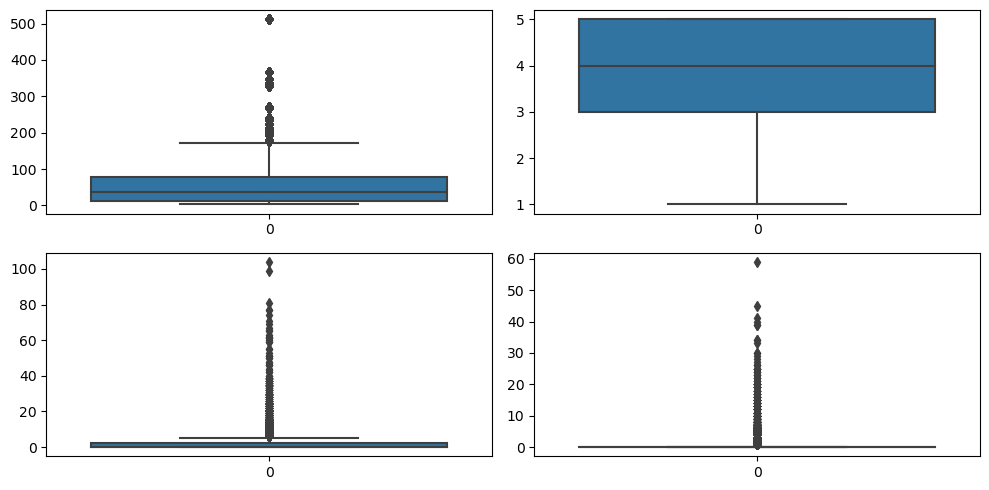

In [10]:
#have a look at outliers of numeric variables

fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(calgary['review_count'], ax = axs[0,0])
plt2 = sns.boxplot(calgary['stars_y'], ax = axs[0,1])
plt3 = sns.boxplot(calgary['useful'], ax = axs[1,0])
plt4 = sns.boxplot(calgary['funny'], ax = axs[1,1])

plt.tight_layout()

In [11]:
#look at how many venues have more than 200 reviews

(calgary["review_count"] > 200).value_counts()



False    77309
True      4873
Name: review_count, dtype: int64

In [17]:
#calculate review count outliers since some venues have more than others

Q1 = calgary["review_count"].quantile(0.25)
Q3 = calgary["review_count"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

#calculate outliers using IQR

filter1 = (calgary["review_count"] <= Q1 - 1.5 * IQR) | (calgary["review_count"] >= Q3 + 1.5 *IQR)

#create a df excluding outlierds

outliers = calgary[filter1 == True]


calgary_noutliers = calgary[filter1 == False]

calgary_noutliers

business_id                            name   latitude  \
0      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
1      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
2      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
3      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
4      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
...                       ...                             ...        ...   
82177  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82178  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82179  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82180  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82181  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   

        longitude  review_count  \
0     -114.037207             3   
1     -114.037207             3   
2     -114.037207             3   
3     -113.989605             5   
4     -113.989605             5   
...           ...           ...   
82177 -114.066646             3   
82178 -114.066646             3   
82179 -114.012717             3   
82180 -114.012717             3   
82181 -114.012717             3   

                                              categories  \
0                Contractors, Landscaping, Home Services   
1                Contractors, Landscaping, Home Services   
2                Contractors, Landscaping, Home Services   
3      Shopping, Caterers, Furniture Stores, Hot Tub ...   
4      Shopping, Caterers, Furniture Stores, Hot Tub ...   
...                                                  ...   
82177                       Pest Control, Local Services   
82178                       Pest Control, Local Services   
82179                     Home Services, Home Inspectors   
82180                     Home Services, Home Inspectors   
82181                     Home Services, Home Inspectors   

                                                   hours  \
0      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
1      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
2      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
3      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
4      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
...                                                  ...   
82177  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82178  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82179  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82180  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82181  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   

                    review_id                 user_id  stars_y  useful  funny  \
0      pltqT0DnejbWN-K32BD1Fg  v6zuRbp5jjHroawRiv9IhQ      5.0       1      0   
1      8Iaf1YXNjo3zPd6-uLSJhg  UkL35C-EXA_yje4HeNINeQ      5.0       0      0   
2      fTU0yYLj78NJftEKah-woQ  CXhdG2DP0aplOZPZtNFobw      5.0       0      0   
3      2SGfqlKDjuFpXZ7LjdNJSQ  siNu6MF02MSMnoyPkaxZyg      5.0       5      0   
4      5RfnOMsGcQ26EoXlteFOyw  -InhDRRVG7wrwsgAUvN4Qw      5.0       6      3   
...                       ...                     ...      ...     ...    ...   
82177  pd7i8sxkMfbjdWR926nz8Q  zYLF37lcx2MPIHZVJjahBA      5.0       1      1   
82178  Uu4txscaQB25tF5kuG4gkg  rlY-ah6vhTHiRkJMEtDJ-g      5.0       1      0   
82179  kooH5UmJ5k-8USDe03jI9Q  Id5k4kNeblkyQSuteVURGQ      1.0       6      0   
82180  2SUoFTckEOdGd1V7GpIvrg  grsdpOuwSdwN3ndafhfa9Q      1.0       3      0   
82181  _1cYlw_lCkStn-RXH2DIbw  5Hs29y5fO7a6ZXWQmUbPaw      1.0       0      0   

       cool                                               text  \
0         0  David came in the spring to give me an estimat...   
1         0  Chinook Landscaping is a Company that I would ...   
2         0  Chinook Landscaping is tops in my book\nI was ...   
3    

In [16]:
#look at how many columns left

calgary_noutliers.shape

(76385, 15)

### 2.5. Deriving filterable columns from 'Categories' column

In [19]:
#creating four columns to have single category since categories column have comma seperated values

calgary_noutliers['column1'] = calgary_noutliers['categories'].str.split(', ').str[0]
calgary_noutliers['column2'] = calgary_noutliers['categories'].str.split(', ').str[1]
calgary_noutliers['column3'] = calgary_noutliers['categories'].str.split(', ').str[2]
calgary_noutliers['column4'] = calgary_noutliers['categories'].str.split(', ').str[3]


calgary_noutliers.head()

business_id                            name  latitude  \
0  MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.94596   
1  MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.94596   
2  MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.94596   
3  rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.08499   
4  rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.08499   

    longitude  review_count  \
0 -114.037207             3   
1 -114.037207             3   
2 -114.037207             3   
3 -113.989605             5   
4 -113.989605             5   

                                          categories  \
0            Contractors, Landscaping, Home Services   
1            Contractors, Landscaping, Home Services   
2            Contractors, Landscaping, Home Services   
3  Shopping, Caterers, Furniture Stores, Hot Tub ...   
4  Shopping, Caterers, Furniture Stores, Hot Tub ...   

                                               hours               review_id  \
0  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  pltqT0DnejbWN-K32BD1Fg   
1  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  8Iaf1YXNjo3zPd6-uLSJhg   
2  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...  fTU0yYLj78NJftEKah-woQ   
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  2SGfqlKDjuFpXZ7LjdNJSQ   
4  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  5RfnOMsGcQ26EoXlteFOyw   

                  user_id  stars_y  useful  funny  cool  \
0  v6zuRbp5jjHroawRiv9IhQ      5.0       1      0     0   
1  UkL35C-EXA_yje4HeNINeQ      5.0       0      0     0   
2  CXhdG2DP0aplOZPZtNFobw      5.0       0      0     0   
3  siNu6MF02MSMnoyPkaxZyg      5.0       5      0     0   
4  -InhDRRVG7wrwsgAUvN4Qw      5.0       6      3     3   

                                                text                 date  \
0  David came in the spring to give me an estimat...  2017-08-16 01:10:52   
1  Chinook Landscaping is a Company that I would ...  2014-06-15 21:09:06   
2  Chinook Landscaping is tops in my book\nI was ...  2013-08-22 22:10:38   
3  If you are looking for a supplier of games tab...  2009-06-29 02:20:25   
4  SML is now a personal wet dream of mine, the e...  2009-12-03 17:29:51   

       column1      column2           column3         column4  
0  Contractors  Landscaping     Home Services             NaN  
1  Contractors  Landscaping     Home Services             NaN  
2  Contractors  Landscaping     Home Services             NaN  
3     Shopping     Caterers  Furniture Stores  Hot Tub & Pool  
4     Shopping     Caterers  Furniture Stores  Hot Tub & Pool

In [20]:
calgary_noutliers["column1"].value_counts()

Restaurants           12692
Food                   3769
Nightlife              2404
Bars                   2137
Shopping               1694
                      ...  
Pain Management           3
Shaved Ice                3
Threading Services        3
Painters                  3
Radiologists              3
Name: column1, Length: 510, dtype: int64

### 2.6. Deriving year information from date column

In [21]:
calgary_noutliers['year'] = calgary_noutliers['date'].str[:4]

calgary_year =calgary_noutliers.groupby(["year"])["stars_y"].agg(["count","mean"]).reset_index()
calgary_year


year  count      mean
0   2008    330  3.524242
1   2009   1434  3.779637
2   2010   2255  3.815078
3   2011   4071  3.644559
4   2012   5378  3.586277
5   2013   5628  3.446162
6   2014   7069  3.486207
7   2015   9357  3.548253
8   2016  10842  3.582549
9   2017  11081  3.626568
10  2018  10477  3.656677
11  2019   8463  3.509866

#### 2.6.1. Line graph showing number of reviews each year from 2009 to 2019

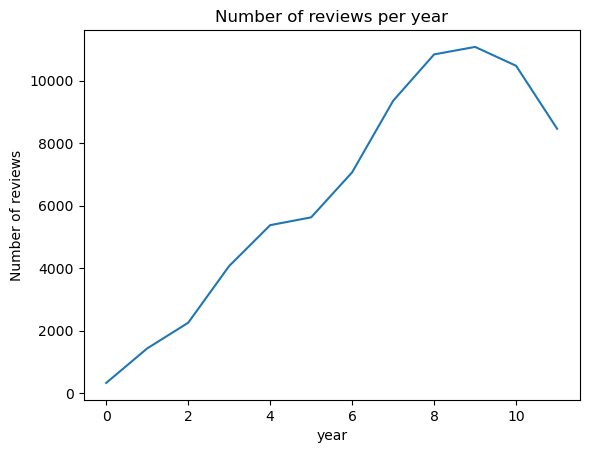

In [25]:
# create a line graph of number of reviews

plt.plot(calgary_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per year')
plt.show()

In [154]:
calgary_noutliers = calgary_noutliers[calgary_noutliers['year'].astype(int) > 2009]

calgary_noutliers


business_id                            name   latitude  \
0      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
1      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
2      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
5      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
6      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
...                       ...                             ...        ...   
82177  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82178  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82179  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82180  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82181  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   

        longitude  review_count  \
0     -114.037207             3   
1     -114.037207             3   
2     -114.037207             3   
5     -113.989605             5   
6     -113.989605             5   
...           ...           ...   
82177 -114.066646             3   
82178 -114.066646             3   
82179 -114.012717             3   
82180 -114.012717             3   
82181 -114.012717             3   

                                              categories  \
0                Contractors, Landscaping, Home Services   
1                Contractors, Landscaping, Home Services   
2                Contractors, Landscaping, Home Services   
5      Shopping, Caterers, Furniture Stores, Hot Tub ...   
6      Shopping, Caterers, Furniture Stores, Hot Tub ...   
...                                                  ...   
82177                       Pest Control, Local Services   
82178                       Pest Control, Local Services   
82179                     Home Services, Home Inspectors   
82180                     Home Services, Home Inspectors   
82181                     Home Services, Home Inspectors   

                                                   hours  \
0      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
1      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
2      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
5      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
6      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
...                                                  ...   
82177  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82178  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82179  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82180  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82181  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   

                    review_id                 user_id  stars_y  ...  funny  \
0      pltqT0DnejbWN-K32BD1Fg  v6zuRbp5jjHroawRiv9IhQ      5.0  ...      0   
1      8Iaf1YXNjo3zPd6-uLSJhg  UkL35C-EXA_yje4HeNINeQ      5.0  ...      0   
2      fTU0yYLj78NJftEKah-woQ  CXhdG2DP0aplOZPZtNFobw      5.0  ...      0   
5      8ypLYaOHH8AXXmyzboBgxw  iqm667X9Jq2hYzRCzFHc8A      1.0  ...      0   
6      K_5sg4x1W2mXr5Q3LS8vuw  _wCGl38y-mVddaYpF8LUaA      1.0  ...      0   
...                       ...                     ...      ...  ...    ...   
82177  pd7i8sxkMfbjdWR926nz8Q  zYLF37lcx2MPIHZVJjahBA      5.0  ...      1   
82178  Uu4txscaQB25tF5kuG4gkg  rlY-ah6vhTHiRkJMEtDJ-g      5.0  ...      0   
82179  kooH5UmJ5k-8USDe03jI9Q  Id5k4kNeblkyQSuteVURGQ      1.0  ...      0   
82180  2SUoFTckEOdGd1V7GpIvrg  grsdpOuwSdwN3ndafhfa9Q      1.0  ...      0   
82181  _1cYlw_lCkStn-RXH2DIbw  5Hs29y5fO7a6ZXWQmUbPaw      1.0  ...      0   

       cool                                               text  \
0         0  David came in the spring to give me an estimat...   
1         0  Chinook Landscaping is a Company that I would ...   
2         0  Chinook Landscaping is tops in my book\nI was ...   
5         0  Went in to the south locatio

### 2.7. Grouping data by Venues 

In [78]:
#grouping all data by venues using business id

venues =calgary_noutliers.groupby(["business_id","name","column1","column2","column3","column4","latitude","longitude"])["stars_y"].agg(["count",min,max,"median","mean"]).reset_index()
venues

business_id                           name  \
0     --YPwqIlRJrhHkJcjY3eiA           That Old Retro Store   
1     -1u4Q4U6OZ-CvqoxUh7gKg                   Las Canarias   
2     -2C96suwzrE_cqI1U69cLA                    Open Sesame   
3     -3k6bAm0_xMD4CYQmH6xHA  Dalhousie Station Foot Clinic   
4     -6ISxWJBGYyI6JKA71rcPQ      Residential Leasing Group   
...                      ...                            ...   
3009  zrBDLK_FVfx3TubDuF-1JQ               Astra Automotive   
3010  zv_e5QK1tuWvJTITVM1PXQ    Mahogany Massage & Wellness   
3011  zwFScgZRXOsWnucfwyn8pw   Nottinghams Pub & Restaurant   
3012  zxT_TuVfr_7OgGdZNyIwyw                 Dublin Calling   
3013  zxl5OV08TBaEg43X3p7_Ng  Acclaim Hotel Calgary Airport   

                        column1               column2                 column3  \
0                 Vinyl Records              Shopping                   Books   
1                    Tapas Bars               Spanish      Tapas/Small Plates   
2                  Asian Fusion           Restaurants                Japanese   
3              Health & Medical       Medical Centers                 Doctors   
4           Property Management  Real Estate Services             Real Estate   
...                         ...                   ...                     ...   
3009                Auto Repair            Automotive     Transmission Repair   
3010           Health & Medical         Beauty & Spas         Massage Therapy   
3011                       Pubs           Restaurants  American (Traditional)   
3012                       Pubs             Irish Pub           Chicken Wings   
3013  Event Planning & Services              Airports         Hotels & Travel   

          column4   latitude   longitude  count  min  max  median      mean  
0            Mags  51.041015 -114.033419      3  1.0  4.0     1.0  2.000000  
1     Restaurants  51.037654 -114.088942     25  1.0  5.0     5.0  4.080000  
2       Nightlife  50.992148 -114.070811     74  1.0  5.0     4.0  3.445946  
3     Podiatrists  51.105195 -114.160208      4  4.0  5.0     5.0  4.750000  
4      Apartments  51.044711 -114.106434      4  1.0  5.0     1.0  2.000000  
...           ...        ...         ...    ...  ...  ...     ...       ...  
3009        Tires  50.997477 -114.060664      4  4.0  5.0     5.0  4.750000  
3010  Acupuncture  50.932756 -113.968063      5  1.0  5.0     4.0  3.200000  
3011      Burgers  51.116559 -114.204570     22  1.0  5.0     4.0  3.409091  
3012  Restaurants  51.038428 -114.141595      5  2.0  3.0     2.0  2.200000  
3013       Hotels  51.150411 -113.999658     24  1.0  5.0     4.0  3.875000  

[3014 rows x 13 columns]

In [152]:
#grouping all data by users using user id

users =calgary_noutliers.groupby(["user_id"])["stars_y"].agg(["count"]).reset_index()
users

user_id  count
0      --B08Ekk4Y_4KFuF9MWdtw      2
1      --BumyUHiO_7YsHurb9Hkw      2
2      --FMYsAcuHSU-i7wbcYgUw      3
3      --ZrzEOMilg6xl-tg97AQw      2
4      --_H9j6ggxvqhh9nPofZwg      3
...                       ...    ...
23920  zz91qXouZnxazd_YgDPVEw      1
23921  zzHM0ObF2PkZjTFW6jfRZA      5
23922  zzYX1o3qhNlO18QGg3LKdg      1
23923  zzgMuJgxmToqcJ5iu1TngQ      2
23924  zzo--VpSQh8PpsGVeMC1dQ      1

[23925 rows x 2 columns]

### 2.8. Filtering only restaurant reviews

In [185]:
calgary_noutliers["column1"].value_counts()

Restaurants                      189
Shopping                         149
Food                             103
Beauty & Spas                     74
Nightlife                         64
                                ... 
Street Vendors                     1
Drywall Installation & Repair      1
Pressure Washers                   1
Appliances & Repair                1
Fences & Gates                     1
Name: column1, Length: 460, dtype: int64

In [186]:
calgary_noutliers["column2"].value_counts()

Restaurants               228
Shopping                  146
Food                      101
Bars                       68
Home Services              60
                         ... 
Golf                        1
Moroccan                    1
Psychologists               1
Newspapers & Magazines      1
Signmaking                  1
Name: column2, Length: 463, dtype: int64

In [187]:
calgary_noutliers["column3"].value_counts()

Restaurants           225
Shopping              137
Food                  105
Bars                   71
Beauty & Spas          69
                     ... 
University Housing      1
Snow Removal            1
Greek                   1
Printing Services       1
Decks & Railing         1
Name: column3, Length: 458, dtype: int64

In [188]:
calgary_noutliers["column4"].value_counts()

Restaurants             197
Shopping                160
Food                    140
Nightlife                69
Automotive               55
                       ... 
Buses                     1
Pet Adoption              1
Commissioned Artists      1
African                   1
Martial Arts              1
Name: column4, Length: 445, dtype: int64

In [53]:
restaurants = calgary_noutliers.loc[(calgary_noutliers.column1=='Restaurants') | (calgary_noutliers.column2=='Restaurants') | (calgary_noutliers.column3=='Restaurants') | (calgary_noutliers.column4=='Restaurants')]

restaurants_group = restaurants.groupby(["business_id","name","column1","column2","column3","column4","latitude","longitude"])["stars_y"].agg(["count",min,max,"median","mean"]).reset_index()

restaurants_group

business_id                          name  \
0    -1u4Q4U6OZ-CvqoxUh7gKg                  Las Canarias   
1    -2C96suwzrE_cqI1U69cLA                   Open Sesame   
2    -7-uHFjQLH_uxPauYtd8iA         Prego Cucina Italiana   
3    -HhGpFRmOPxJuzmNTWHqhQ                     Sushi2you   
4    -Miw03v5yXJWjH9MN1aglw                      The Nash   
..                      ...                           ...   
824  zYs33RJ3-Ply40HQdY9kbw               Oak Tree Tavern   
825  z_BS6qapXMX1fA4ZLZ3jCA                   Dairy Queen   
826  z_HWmTH5eR5iEJBfYsPvxg             East Side Mario's   
827  zwFScgZRXOsWnucfwyn8pw  Nottinghams Pub & Restaurant   
828  zxT_TuVfr_7OgGdZNyIwyw                Dublin Calling   

                       column1         column2                 column3  \
0                   Tapas Bars         Spanish      Tapas/Small Plates   
1                 Asian Fusion     Restaurants                Japanese   
2                    Wine Bars            Bars               Nightlife   
3                  Restaurants      Food Court              Sushi Bars   
4                    Nightlife  Canadian (New)             Restaurants   
..                         ...             ...                     ...   
824                  Nightlife            Bars             Restaurants   
825  Ice Cream & Frozen Yogurt            Food               Fast Food   
826                Restaurants           Pizza  American (Traditional)   
827                       Pubs     Restaurants  American (Traditional)   
828                       Pubs       Irish Pub           Chicken Wings   

         column4   latitude   longitude  count  min  max  median      mean  
0    Restaurants  51.037654 -114.088942     25  1.0  5.0     5.0  4.080000  
1      Nightlife  50.992148 -114.070811     74  1.0  5.0     4.0  3.445946  
2    Restaurants  51.052572 -114.068347     17  1.0  5.0     4.0  3.647059  
3       Japanese  51.075125 -113.956028      5  1.0  5.0     5.0  3.400000  
4           Bars  51.041415 -114.037001    128  1.0  5.0     4.0  3.906250  
..           ...        ...         ...    ...  ...  ...     ...       ...  
824         Pubs  51.052903 -114.085536     40  1.0  5.0     4.0  3.800000  
825  Restaurants  51.013744 -114.132804      4  1.0  2.0     1.0  1.250000  
826      Italian  50.906484 -114.066818     22  1.0  5.0     2.0  2.454545  
827      Burgers  51.116559 -114.204570     22  1.0  5.0     4.0  3.409091  
828  Restaurants  51.038428 -114.141595      5  2.0  3.0     2.0  2.200000  

[829 rows x 13 columns]

### 2.9. Converting csv data into spatial point data


##### 2.9.1 All reviews into spatial data


In [64]:
#convert df into gdf using easting and northings 
#project the gdf into British National Grid (27700)

calgary_gdf = gpd.GeoDataFrame(
    calgary_noutliers, 
    geometry=gpd.points_from_xy(calgary_noutliers.longitude, 
                                      calgary_noutliers.latitude)).set_crs(epsg=4326)


##### 2.9.2. Venues into gdf


In [80]:
venue_gdf = gpd.GeoDataFrame(
    venues, 
    geometry=gpd.points_from_xy(venues.longitude, 
                                      venues.latitude)).set_crs(epsg=4326)

##### 2.9.3. Outliers into gdf


In [ ]:
outliers_gdf  = gpd.GeoDataFrame(
    outliers, 
    geometry=gpd.points_from_xy(outliers.longitude, 
                                      outliers.latitude)).set_crs(epsg=4326)

##### 2.9.4. Restaurant Reviews


In [56]:
#convert restarants into gdf using easting and northings 
#project the gdf into British National Grid (27700)

restaurants_gdf = gpd.GeoDataFrame(
    restaurants_group, 
    geometry=gpd.points_from_xy(restaurants_group.longitude, 
                                      restaurants_group.latitude)).set_crs(epsg=4326)
restaurants_gdf


business_id                          name  \
0    -1u4Q4U6OZ-CvqoxUh7gKg                  Las Canarias   
1    -2C96suwzrE_cqI1U69cLA                   Open Sesame   
2    -7-uHFjQLH_uxPauYtd8iA         Prego Cucina Italiana   
3    -HhGpFRmOPxJuzmNTWHqhQ                     Sushi2you   
4    -Miw03v5yXJWjH9MN1aglw                      The Nash   
..                      ...                           ...   
824  zYs33RJ3-Ply40HQdY9kbw               Oak Tree Tavern   
825  z_BS6qapXMX1fA4ZLZ3jCA                   Dairy Queen   
826  z_HWmTH5eR5iEJBfYsPvxg             East Side Mario's   
827  zwFScgZRXOsWnucfwyn8pw  Nottinghams Pub & Restaurant   
828  zxT_TuVfr_7OgGdZNyIwyw                Dublin Calling   

                       column1         column2                 column3  \
0                   Tapas Bars         Spanish      Tapas/Small Plates   
1                 Asian Fusion     Restaurants                Japanese   
2                    Wine Bars            Bars               Nightlife   
3                  Restaurants      Food Court              Sushi Bars   
4                    Nightlife  Canadian (New)             Restaurants   
..                         ...             ...                     ...   
824                  Nightlife            Bars             Restaurants   
825  Ice Cream & Frozen Yogurt            Food               Fast Food   
826                Restaurants           Pizza  American (Traditional)   
827                       Pubs     Restaurants  American (Traditional)   
828                       Pubs       Irish Pub           Chicken Wings   

         column4   latitude   longitude  count  min  max  median      mean  \
0    Restaurants  51.037654 -114.088942     25  1.0  5.0     5.0  4.080000   
1      Nightlife  50.992148 -114.070811     74  1.0  5.0     4.0  3.445946   
2    Restaurants  51.052572 -114.068347     17  1.0  5.0     4.0  3.647059   
3       Japanese  51.075125 -113.956028      5  1.0  5.0     5.0  3.400000   
4           Bars  51.041415 -114.037001    128  1.0  5.0     4.0  3.906250   
..           ...        ...         ...    ...  ...  ...     ...       ...   
824         Pubs  51.052903 -114.085536     40  1.0  5.0     4.0  3.800000   
825  Restaurants  51.013744 -114.132804      4  1.0  2.0     1.0  1.250000   
826      Italian  50.906484 -114.066818     22  1.0  5.0     2.0  2.454545   
827      Burgers  51.116559 -114.204570     22  1.0  5.0     4.0  3.409091   
828  Restaurants  51.038428 -114.141595      5  2.0  3.0     2.0  2.200000   

                        geometry  
0    POINT (-114.08894 51.03765)  
1    POINT (-114.07081 50.99215)  
2    POINT (-114.06835 51.05257)  
3    POINT (-113.95603 51.07512)  
4    POINT (-114.03700 51.04141)  
..                           ...  
824  POINT (-114.08554 51.05290)  
825  POINT (-114.13280 51.01374)  
826  POINT (-114.06682 50.90648)  
827  POINT (-114.20457 51.11656)  
828  POINT (-114.14159 51.03843)  

[829 rows x 14 columns]

### 2.10. Creating dependent variable from customer satisfaction rates


In [69]:
calgary_gdf["polarity"] = np.where(calgary_gdf['stars_y'] > 3, 1, 0)

#convert string polarity into integer

calgary_gdf["polarity"] = calgary_gdf["polarity"].astype('int')

calgary_gdf

business_id                            name   latitude  \
0      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
1      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
2      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
3      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
4      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
...                       ...                             ...        ...   
82177  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82178  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82179  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82180  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82181  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   

        longitude  review_count  \
0     -114.037207             3   
1     -114.037207             3   
2     -114.037207             3   
3     -113.989605             5   
4     -113.989605             5   
...           ...           ...   
82177 -114.066646             3   
82178 -114.066646             3   
82179 -114.012717             3   
82180 -114.012717             3   
82181 -114.012717             3   

                                              categories  \
0                Contractors, Landscaping, Home Services   
1                Contractors, Landscaping, Home Services   
2                Contractors, Landscaping, Home Services   
3      Shopping, Caterers, Furniture Stores, Hot Tub ...   
4      Shopping, Caterers, Furniture Stores, Hot Tub ...   
...                                                  ...   
82177                       Pest Control, Local Services   
82178                       Pest Control, Local Services   
82179                     Home Services, Home Inspectors   
82180                     Home Services, Home Inspectors   
82181                     Home Services, Home Inspectors   

                                                   hours  \
0      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
1      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
2      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
3      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
4      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
...                                                  ...   
82177  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82178  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82179  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82180  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82181  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   

                    review_id                 user_id  stars_y  ...  cool  \
0      pltqT0DnejbWN-K32BD1Fg  v6zuRbp5jjHroawRiv9IhQ      5.0  ...     0   
1      8Iaf1YXNjo3zPd6-uLSJhg  UkL35C-EXA_yje4HeNINeQ      5.0  ...     0   
2      fTU0yYLj78NJftEKah-woQ  CXhdG2DP0aplOZPZtNFobw      5.0  ...     0   
3      2SGfqlKDjuFpXZ7LjdNJSQ  siNu6MF02MSMnoyPkaxZyg      5.0  ...     0   
4      5RfnOMsGcQ26EoXlteFOyw  -InhDRRVG7wrwsgAUvN4Qw      5.0  ...     3   
...                       ...                     ...      ...  ...   ...   
82177  pd7i8sxkMfbjdWR926nz8Q  zYLF37lcx2MPIHZVJjahBA      5.0  ...     0   
82178  Uu4txscaQB25tF5kuG4gkg  rlY-ah6vhTHiRkJMEtDJ-g      5.0  ...     0   
82179  kooH5UmJ5k-8USDe03jI9Q  Id5k4kNeblkyQSuteVURGQ      1.0  ...     0   
82180  2SUoFTckEOdGd1V7GpIvrg  grsdpOuwSdwN3ndafhfa9Q      1.0  ...     0   
82181  _1cYlw_lCkStn-RXH2DIbw  5Hs29y5fO7a6ZXWQmUbPaw      1.0  ...     0   

                                                    text                 date  \
0      David came in the spring to give me an estimat...  2017-08-16 01:10:52   
1      Chinook Landscaping is a Company that I would ...  2014-06-15 21:09:06   
2      Chinook Landscaping is tops in my book\nI was ...  2013-08-22 22:10

In [57]:
restaurants_gdf["polarity"] = np.where(restaurants_gdf['mean'] > 3, 1, 0)


restaurants_gdf


business_id                          name  \
0    -1u4Q4U6OZ-CvqoxUh7gKg                  Las Canarias   
1    -2C96suwzrE_cqI1U69cLA                   Open Sesame   
2    -7-uHFjQLH_uxPauYtd8iA         Prego Cucina Italiana   
3    -HhGpFRmOPxJuzmNTWHqhQ                     Sushi2you   
4    -Miw03v5yXJWjH9MN1aglw                      The Nash   
..                      ...                           ...   
824  zYs33RJ3-Ply40HQdY9kbw               Oak Tree Tavern   
825  z_BS6qapXMX1fA4ZLZ3jCA                   Dairy Queen   
826  z_HWmTH5eR5iEJBfYsPvxg             East Side Mario's   
827  zwFScgZRXOsWnucfwyn8pw  Nottinghams Pub & Restaurant   
828  zxT_TuVfr_7OgGdZNyIwyw                Dublin Calling   

                       column1         column2                 column3  \
0                   Tapas Bars         Spanish      Tapas/Small Plates   
1                 Asian Fusion     Restaurants                Japanese   
2                    Wine Bars            Bars               Nightlife   
3                  Restaurants      Food Court              Sushi Bars   
4                    Nightlife  Canadian (New)             Restaurants   
..                         ...             ...                     ...   
824                  Nightlife            Bars             Restaurants   
825  Ice Cream & Frozen Yogurt            Food               Fast Food   
826                Restaurants           Pizza  American (Traditional)   
827                       Pubs     Restaurants  American (Traditional)   
828                       Pubs       Irish Pub           Chicken Wings   

         column4   latitude   longitude  count  min  max  median      mean  \
0    Restaurants  51.037654 -114.088942     25  1.0  5.0     5.0  4.080000   
1      Nightlife  50.992148 -114.070811     74  1.0  5.0     4.0  3.445946   
2    Restaurants  51.052572 -114.068347     17  1.0  5.0     4.0  3.647059   
3       Japanese  51.075125 -113.956028      5  1.0  5.0     5.0  3.400000   
4           Bars  51.041415 -114.037001    128  1.0  5.0     4.0  3.906250   
..           ...        ...         ...    ...  ...  ...     ...       ...   
824         Pubs  51.052903 -114.085536     40  1.0  5.0     4.0  3.800000   
825  Restaurants  51.013744 -114.132804      4  1.0  2.0     1.0  1.250000   
826      Italian  50.906484 -114.066818     22  1.0  5.0     2.0  2.454545   
827      Burgers  51.116559 -114.204570     22  1.0  5.0     4.0  3.409091   
828  Restaurants  51.038428 -114.141595      5  2.0  3.0     2.0  2.200000   

                        geometry  polarity  
0    POINT (-114.08894 51.03765)         1  
1    POINT (-114.07081 50.99215)         1  
2    POINT (-114.06835 51.05257)         1  
3    POINT (-113.95603 51.07512)         1  
4    POINT (-114.03700 51.04141)         1  
..                           ...       ...  
824  POINT (-114.08554 51.05290)         1  
825  POINT (-114.13280 51.01374)         0  
826  POINT (-114.06682 50.90648)         0  
827  POINT (-114.20457 51.11656)         1  
828  POINT (-114.14159 51.03843)         0  

[829 rows x 15 columns]

In [81]:
venue_gdf["polarity"] = np.where(venue_gdf['mean'] > 3, 1, 0)


venue_gdf

business_id                           name  \
0     --YPwqIlRJrhHkJcjY3eiA           That Old Retro Store   
1     -1u4Q4U6OZ-CvqoxUh7gKg                   Las Canarias   
2     -2C96suwzrE_cqI1U69cLA                    Open Sesame   
3     -3k6bAm0_xMD4CYQmH6xHA  Dalhousie Station Foot Clinic   
4     -6ISxWJBGYyI6JKA71rcPQ      Residential Leasing Group   
...                      ...                            ...   
3009  zrBDLK_FVfx3TubDuF-1JQ               Astra Automotive   
3010  zv_e5QK1tuWvJTITVM1PXQ    Mahogany Massage & Wellness   
3011  zwFScgZRXOsWnucfwyn8pw   Nottinghams Pub & Restaurant   
3012  zxT_TuVfr_7OgGdZNyIwyw                 Dublin Calling   
3013  zxl5OV08TBaEg43X3p7_Ng  Acclaim Hotel Calgary Airport   

                        column1               column2                 column3  \
0                 Vinyl Records              Shopping                   Books   
1                    Tapas Bars               Spanish      Tapas/Small Plates   
2                  Asian Fusion           Restaurants                Japanese   
3              Health & Medical       Medical Centers                 Doctors   
4           Property Management  Real Estate Services             Real Estate   
...                         ...                   ...                     ...   
3009                Auto Repair            Automotive     Transmission Repair   
3010           Health & Medical         Beauty & Spas         Massage Therapy   
3011                       Pubs           Restaurants  American (Traditional)   
3012                       Pubs             Irish Pub           Chicken Wings   
3013  Event Planning & Services              Airports         Hotels & Travel   

          column4   latitude   longitude  count  min  max  median      mean  \
0            Mags  51.041015 -114.033419      3  1.0  4.0     1.0  2.000000   
1     Restaurants  51.037654 -114.088942     25  1.0  5.0     5.0  4.080000   
2       Nightlife  50.992148 -114.070811     74  1.0  5.0     4.0  3.445946   
3     Podiatrists  51.105195 -114.160208      4  4.0  5.0     5.0  4.750000   
4      Apartments  51.044711 -114.106434      4  1.0  5.0     1.0  2.000000   
...           ...        ...         ...    ...  ...  ...     ...       ...   
3009        Tires  50.997477 -114.060664      4  4.0  5.0     5.0  4.750000   
3010  Acupuncture  50.932756 -113.968063      5  1.0  5.0     4.0  3.200000   
3011      Burgers  51.116559 -114.204570     22  1.0  5.0     4.0  3.409091   
3012  Restaurants  51.038428 -114.141595      5  2.0  3.0     2.0  2.200000   
3013       Hotels  51.150411 -113.999658     24  1.0  5.0     4.0  3.875000   

                         geometry  polarity  
0     POINT (-114.03342 51.04102)         0  
1     POINT (-114.08894 51.03765)         1  
2     POINT (-114.07081 50.99215)         1  
3     POINT (-114.16021 51.10519)         1  
4     POINT (-114.10643 51.04471)         0  
...                           ...       ...  
3009  POINT (-114.06066 50.99748)         1  
3010  POINT (-113.96806 50.93276)         1  
3011  POINT (-114.20457 51.11656)         1  
3012  POINT (-114.14159 51.03843)         0  
3013  POINT (-113.99966 51.15041)         1  

[3014 rows x 15 columns]

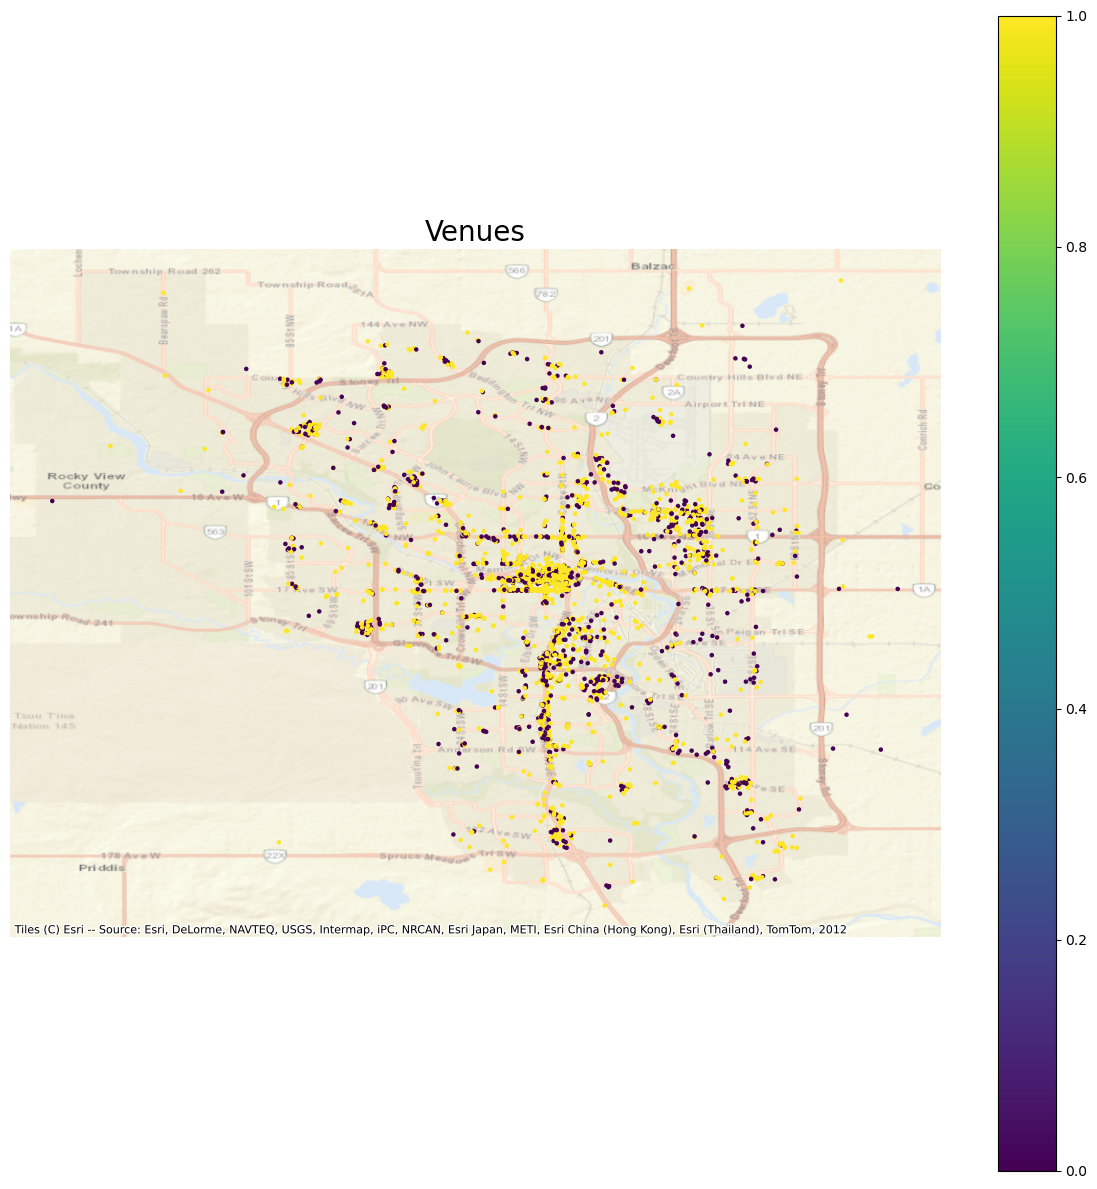

In [83]:
#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


venue_gdf.plot(ax=ax,marker='o',column="polarity", markersize=5,legend=True)

ctx.add_basemap(ax, crs=venue_gdf.crs, alpha=0.6, source=ctx.providers.Esri.WorldStreetMap)


# this sets the title
ax.set_title("Venues",fontsize= 20)

# this removes the axis
ax.set_axis_off()

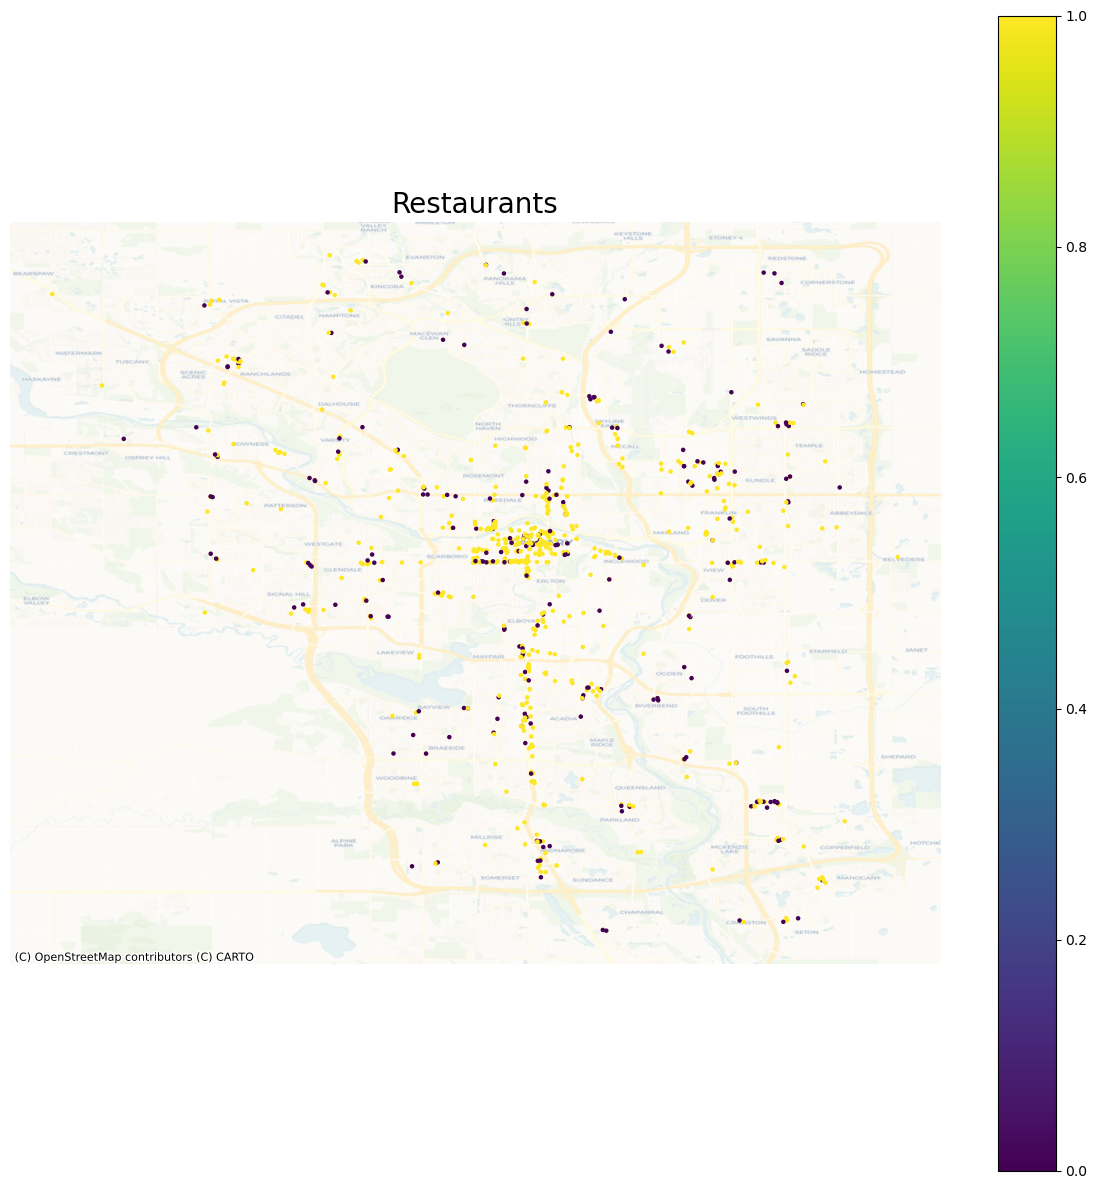

In [60]:
#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


restaurants_gdf.plot(ax=ax,marker='o', column= "polarity",markersize=5,legend=True)


# this adds the basemap
ctx.add_basemap(ax, crs=calgary_gdf.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager)

# this sets the title
ax.set_title("Restaurants",fontsize= 20)

# this removes the axis
ax.set_axis_off()

In [65]:
outliers_gdf["polarity"] = np.where(outliers_gdf['stars_y'] > 3, 1, 0)

#convert string polarity into integer

outliers_gdf["polarity"] = outliers_gdf["polarity"].astype('int')

outliers_gdf

business_id                          name   latitude  \
3066   EZ3vflgYwoBAJDrhc0TCbw  Hayden Block Smoke & Whiskey  51.052655   
3067   EZ3vflgYwoBAJDrhc0TCbw  Hayden Block Smoke & Whiskey  51.052655   
3068   EZ3vflgYwoBAJDrhc0TCbw  Hayden Block Smoke & Whiskey  51.052655   
3069   EZ3vflgYwoBAJDrhc0TCbw  Hayden Block Smoke & Whiskey  51.052655   
3070   EZ3vflgYwoBAJDrhc0TCbw  Hayden Block Smoke & Whiskey  51.052655   
...                       ...                           ...        ...   
80769  B9Qt4Eyk3lpz2LEtGU205g              Cactus Club Cafe  51.089517   
80770  B9Qt4Eyk3lpz2LEtGU205g              Cactus Club Cafe  51.089517   
80771  B9Qt4Eyk3lpz2LEtGU205g              Cactus Club Cafe  51.089517   
80772  B9Qt4Eyk3lpz2LEtGU205g              Cactus Club Cafe  51.089517   
80773  B9Qt4Eyk3lpz2LEtGU205g              Cactus Club Cafe  51.089517   

        longitude  review_count  \
3066  -114.088296           177   
3067  -114.088296           177   
3068  -114.088296           177   
3069  -114.088296           177   
3070  -114.088296           177   
...           ...           ...   
80769 -114.000813           177   
80770 -114.000813           177   
80771 -114.000813           177   
80772 -114.000813           177   
80773 -114.000813           177   

                                              categories  \
3066   Nightlife, Barbeque, Restaurants, Bars, Whiske...   
3067   Nightlife, Barbeque, Restaurants, Bars, Whiske...   
3068   Nightlife, Barbeque, Restaurants, Bars, Whiske...   
3069   Nightlife, Barbeque, Restaurants, Bars, Whiske...   
3070   Nightlife, Barbeque, Restaurants, Bars, Whiske...   
...                                                  ...   
80769  Canadian (New), Cocktail Bars, Restaurants, Ni...   
80770  Canadian (New), Cocktail Bars, Restaurants, Ni...   
80771  Canadian (New), Cocktail Bars, Restaurants, Ni...   
80772  Canadian (New), Cocktail Bars, Restaurants, Ni...   
80773  Canadian (New), Cocktail Bars, Restaurants, Ni...   

                                                   hours  \
3066   {'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...   
3067   {'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...   
3068   {'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...   
3069   {'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...   
3070   {'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...   
...                                                  ...   
80769  {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...   
80770  {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...   
80771  {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...   
80772  {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...   
80773  {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...   

                    review_id                 user_id  stars_y  useful  funny  \
3066   tCIyek7ktmCFQW3TY70sRw  A4bpHuvzaQt9-XAg8e9Msw      4.0       1      0   
3067   Sx6OhaF557RYd3N18OIkzg  brd33PD_6nqK_VVnO3NWAg      5.0       0      0   
3068   TPaJF3PokYqQN8rG1D_spg  R5Ab6TcorcES3jiQ6BiiDQ      5.0       0      0   
3069   ms9yJpAhYGC-FYFfJ2i2sg  Z5r70En-h8IGz2xWiPxnQg      4.0       0      0   
3070   _djyUVYzJIpH27W6E_0pPw  130UUjfFfVyvAMTN1p2npg      4.0       0      0   
...                       ...                     ...      ...     ...    ...   
80769  radJF4C_UGBU1XtkiiF-aQ  ABRH3A37M24GrCR3-bX1Pw      5.0       1      0   
80770  z6L7Qk8SMA8jSXEi9WUUZg  Nhzu39a-thKikoYUAGrLbg      5.0       0      0   
80771  -IJKiInW57yvx53abs1gCA  77-clznSALDVUdq7TDAhJQ      1.0       1      0   
80772  gXlseVDZPrBo58Tl4xeP4g  S8A9AQWmYZfXsyHVTMKXGw      5.0       0      0   
80773  jguEtlBgB5reLrPSmUZ_LQ  ErVfSvzGkEK2DVV_Dw4dmg      4.0       0      0   

       cool                                               text  \
3066      0  Oh my dear Brisket, you and I shall be togethe...   
3067      0  there's nothing bad to say here. I can't even ...   
3068      0  Love this place, some of the best BBQ and amaz...   
3069      0  I've been here a

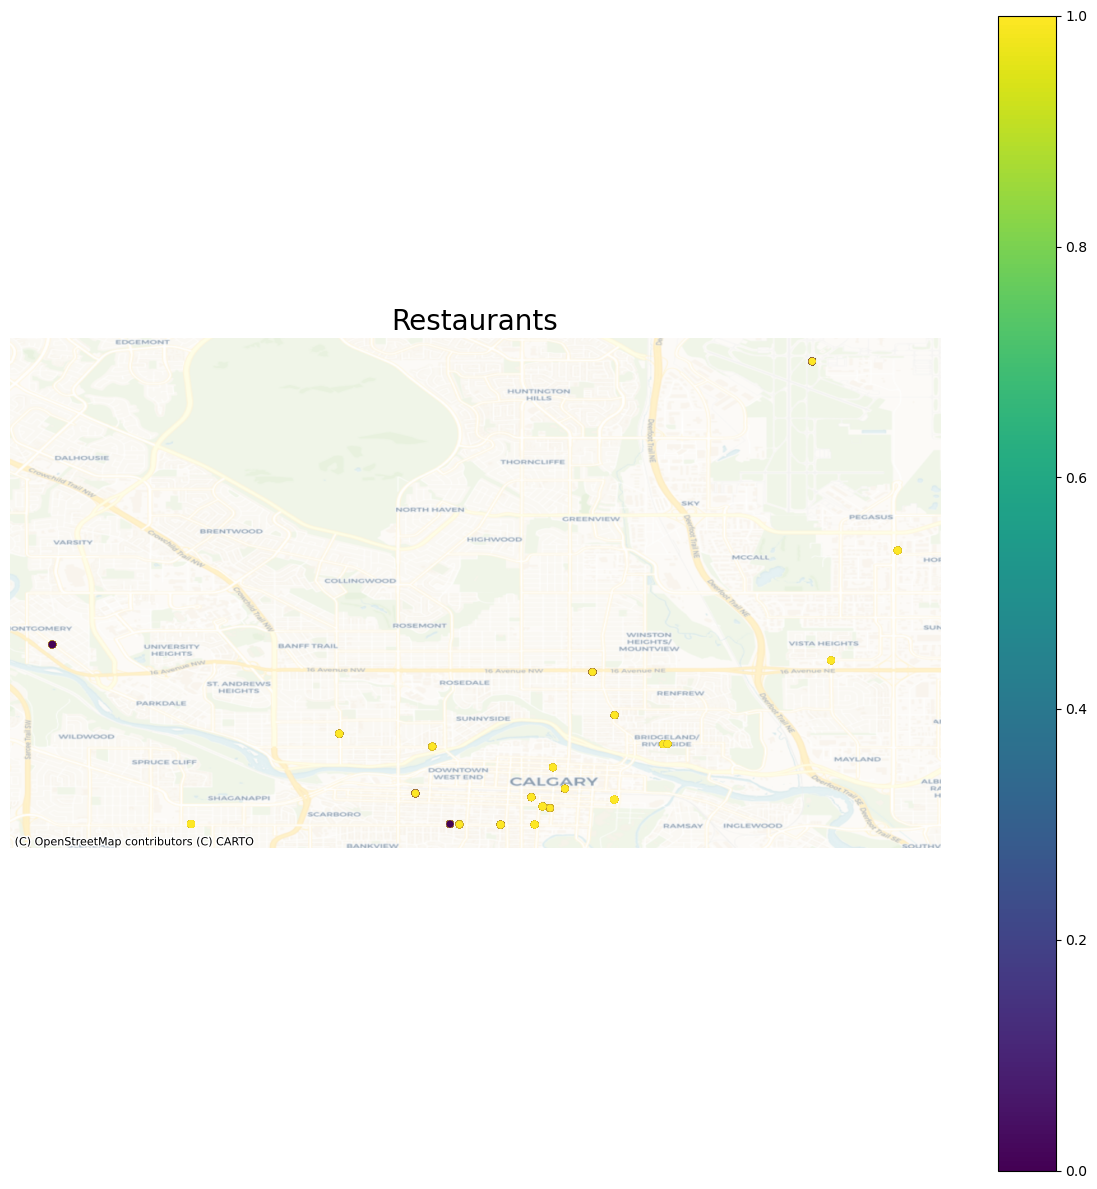

In [66]:
#mapping housing price distribution in London without dealing with outliers

fig, ax = plt.subplots(figsize=(15, 15))


ax.set_aspect('equal')


outliers_gdf.plot(ax=ax,marker='o', column= "polarity",markersize=20,legend=True)


# this adds the basemap
ctx.add_basemap(ax, crs=calgary_gdf.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager)

# this sets the title
ax.set_title("Restaurants",fontsize= 20)

# this removes the axis
ax.set_axis_off()

In [202]:
outliers_group =outliers.groupby("business_id")["stars_y"].agg(["count",min,max,"median","mean"]).reset_index()
outliers_group

business_id  count  min  max  median      mean
0   5aK167zvZhGs_i7Vf4A1NQ    518  1.0  5.0     5.0  4.480695
1   7DjrTaEIa-7x3o-Trp2Htw    217  1.0  5.0     4.0  4.304147
2   8dnH_PcGlzECcCGk_5yyww    202  1.0  5.0     4.0  4.064356
3   9tgJbLfCQcZ35-TSabZOfA    245  1.0  5.0     4.0  4.204082
4   ARH8diyhBtiSgRR4_7oxmg    183  1.0  5.0     4.0  3.590164
5   B9Qt4Eyk3lpz2LEtGU205g    181  1.0  5.0     5.0  4.392265
6   CE7hNKYS6gIMKv6jK429uQ    214  1.0  5.0     4.0  4.228972
7   DqSTQWhRU3WKdIN2b_Nzog    180  1.0  5.0     5.0  4.116667
8   EZ3vflgYwoBAJDrhc0TCbw    178  1.0  5.0     5.0  4.325843
9   GGxnlrfvWy7LFvjN5z_z3w    337  1.0  5.0     4.0  4.089021
10  KMjpXsJFNiqE18orsi4stQ    350  1.0  5.0     3.0  3.205714
11  KSSOnRQ1YSciCIkR-qOR4A    232  1.0  5.0     4.0  3.905172
12  Qtu-zIwz4TDUu1U7oxCgHg    239  1.0  5.0     4.0  3.962343
13  SKhV8mF40RcsGrJjkuEwvw    374  1.0  5.0     5.0  4.532086
14  SYCgakqaEBTjRhOVFXjV3g    251  1.0  5.0     4.0  4.007968
15  YpoIDLyRGhgciExGAHRQcw    351  1.0  5.0     4.0  4.111111
16  iAhAnPxgKb6fzxrEcoHtlw    206  1.0  5.0     5.0  4.446602
17  kmOeRAvOL1oR6Z-4Ggdx6w    335  1.0  5.0     4.0  4.000000
18  llad5ng0sxHkWrK1ZlswxA    244  1.0  5.0     5.0  4.643443
19  tWjfgVtTD5n01Cq9dFWGsA    215  1.0  5.0     4.0  3.544186
20  tXoO9Uc_tQ8_IqTmEQcW5w    272  1.0  5.0     5.0  4.566176
21  v1C8WQR6iB0WW0W48T5pqA    273  1.0  5.0     4.0  3.406593

In [85]:
calgary_gdf["stars_y"] = calgary_gdf["stars_y"].astype(int)

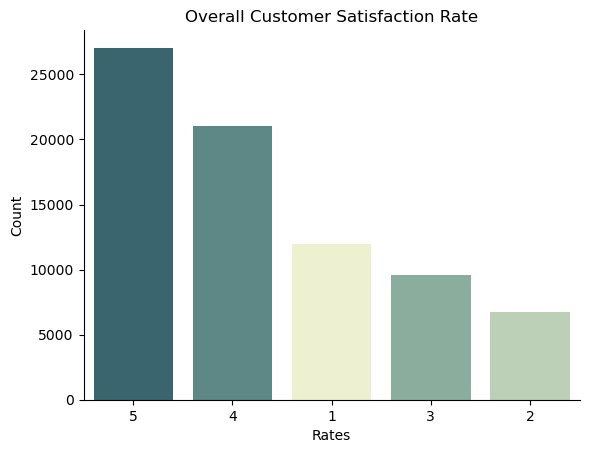

In [86]:


colors = ['#326B77', '#568F8B', '#F3F6CC','#84B39E','#B9D4B2']



# Create countplot
ax = sns.countplot(calgary_gdf,
              x='stars_y',
              palette=colors,
              order=calgary_gdf["stars_y"].value_counts().index)

# Set title and labels
ax.set(title="Overall Customer Satisfaction Rate", xlabel="Rates", ylabel="Count")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# set the file path and save the plot
file_path = "/Users/user/Desktop/Mining/data-mining-coursework/coursework2_visual/rate_bar1.png" # Replace with your desired path
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()


In [72]:
calgary_gdf_group= calgary_gdf.groupby("polarity")["business_id"].agg(["count"]).reset_index()

calgary_gdf_group["polarity"] = calgary_gdf_group["polarity"].astype("str")

calgary_gdf_group["polarity"][calgary_gdf_group["polarity"] == "0"] = "Negative"

calgary_gdf_group["polarity"][calgary_gdf_group["polarity"] == "1"] = "Positive"


calgary_gdf_group

polarity  count
0  Negative  28322
1  Positive  48063

https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/

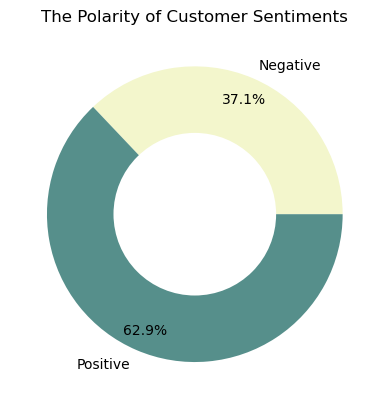

In [87]:
# colors
colors = ['#F3F6CC','#568F8B']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(calgary_gdf_group["count"], colors=colors, labels=calgary_gdf_group["polarity"],
        autopct='%1.1f%%', pctdistance=0.85)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('The Polarity of Customer Sentiments')

# set the file path and save the plot
file_path = "/Users/user/Desktop/Mining/data-mining-coursework/coursework2_visual/polarity_pie2.png" # Replace with your desired path
plt.savefig(file_path, dpi=300, bbox_inches='tight')
  
# Displaying Chart
plt.show()

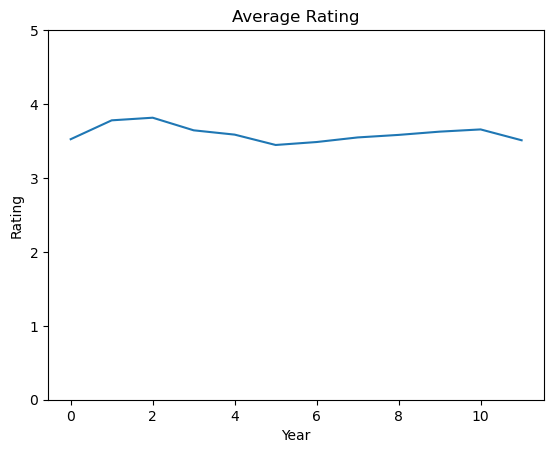

In [88]:
plt.plot(calgary_year['mean'])
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Rating')
plt.ylim(0,5)
plt.show()

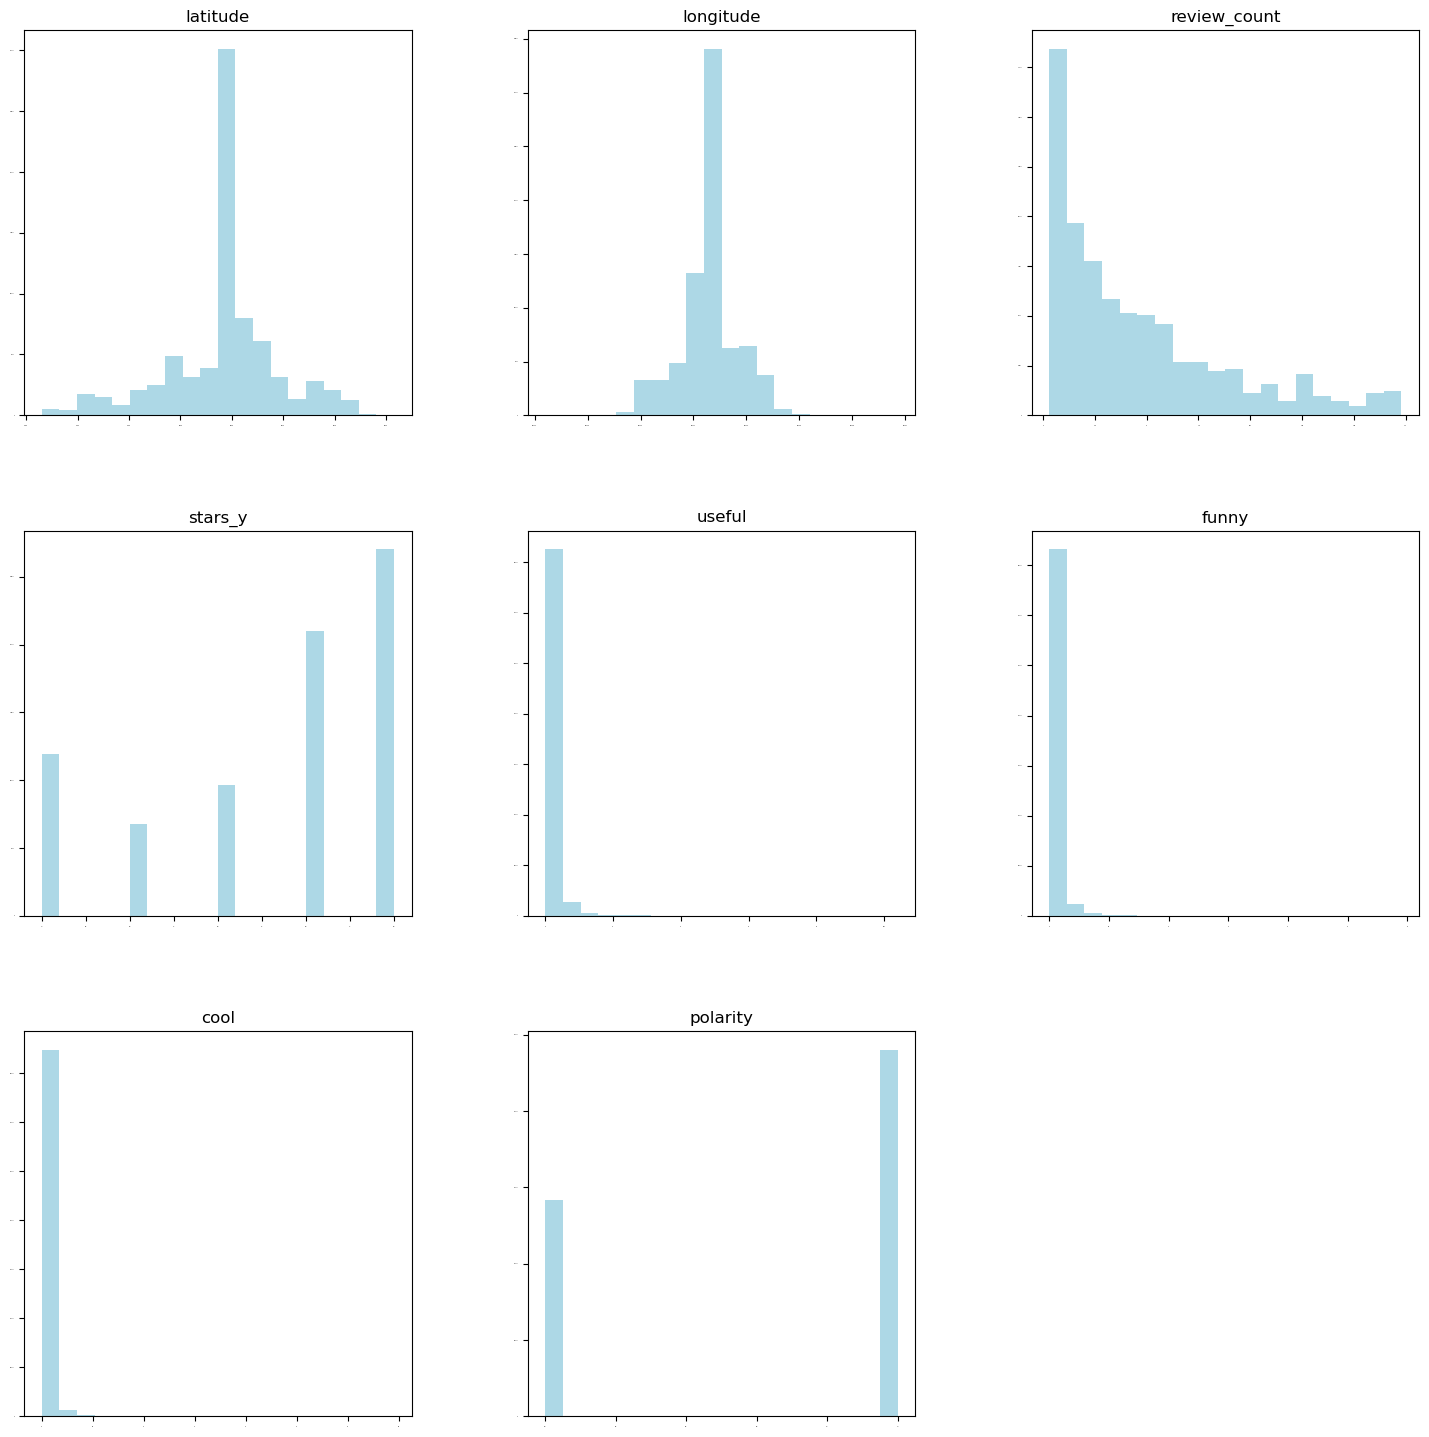

In [89]:
calgary_gdf.hist(bins=20,
       figsize=(18,18), 
       color='lightblue', 
       xlabelsize=0, 
       ylabelsize=0, 
       grid=False
      )
plt.show()

### 3. Text Mining

https://www.analyticsvidhya.com/blog/2022/10/using-text-mining-on-reviews-data-to-generate-business-insights/

#### 3.1 Removing Non-latin Characters, Punctuations, Stop Words from Reviews

In [91]:
import re


def remove_non_latin(text):
    """
    Removes non-Latin characters from text using regular expressions.
    """
    latin_only = re.sub(r'[^\x00-\x7F]+', '', text)
    return latin_only

# Apply the function to the 'text' column
calgary_gdf['text_processed'] = calgary_gdf['text'].apply(remove_non_latin)

calgary_gdf

business_id                            name   latitude  \
0      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
1      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
2      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
3      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
4      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
...                       ...                             ...        ...   
82177  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82178  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82179  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82180  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82181  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   

        longitude  review_count  \
0     -114.037207             3   
1     -114.037207             3   
2     -114.037207             3   
3     -113.989605             5   
4     -113.989605             5   
...           ...           ...   
82177 -114.066646             3   
82178 -114.066646             3   
82179 -114.012717             3   
82180 -114.012717             3   
82181 -114.012717             3   

                                              categories  \
0                Contractors, Landscaping, Home Services   
1                Contractors, Landscaping, Home Services   
2                Contractors, Landscaping, Home Services   
3      Shopping, Caterers, Furniture Stores, Hot Tub ...   
4      Shopping, Caterers, Furniture Stores, Hot Tub ...   
...                                                  ...   
82177                       Pest Control, Local Services   
82178                       Pest Control, Local Services   
82179                     Home Services, Home Inspectors   
82180                     Home Services, Home Inspectors   
82181                     Home Services, Home Inspectors   

                                                   hours  \
0      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
1      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
2      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
3      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
4      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
...                                                  ...   
82177  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82178  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82179  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82180  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82181  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   

                    review_id                 user_id  stars_y  ...  \
0      pltqT0DnejbWN-K32BD1Fg  v6zuRbp5jjHroawRiv9IhQ        5  ...   
1      8Iaf1YXNjo3zPd6-uLSJhg  UkL35C-EXA_yje4HeNINeQ        5  ...   
2      fTU0yYLj78NJftEKah-woQ  CXhdG2DP0aplOZPZtNFobw        5  ...   
3      2SGfqlKDjuFpXZ7LjdNJSQ  siNu6MF02MSMnoyPkaxZyg        5  ...   
4      5RfnOMsGcQ26EoXlteFOyw  -InhDRRVG7wrwsgAUvN4Qw        5  ...   
...                       ...                     ...      ...  ...   
82177  pd7i8sxkMfbjdWR926nz8Q  zYLF37lcx2MPIHZVJjahBA        5  ...   
82178  Uu4txscaQB25tF5kuG4gkg  rlY-ah6vhTHiRkJMEtDJ-g        5  ...   
82179  kooH5UmJ5k-8USDe03jI9Q  Id5k4kNeblkyQSuteVURGQ        1  ...   
82180  2SUoFTckEOdGd1V7GpIvrg  grsdpOuwSdwN3ndafhfa9Q        1  ...   
82181  _1cYlw_lCkStn-RXH2DIbw  5Hs29y5fO7a6ZXWQmUbPaw        1  ...   

                                                    text                 date  \
0      David came in the spring to give me an estimat...  2017-08-16 01:10:52   
1      Chinook Landscaping is a Company that I would ...  2014-06-15 21:09:06   
2      Chinook Landscaping is tops in my book\nI was ...  2013-08-22 22:10:38   
3      If you are looking for a supplier of games tab...  2009-06

In [103]:
import string
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize


#https://stackoverflow.com/questions/57030670/how-to-remove-punctuation-and-numbers-during-tweettokenizer-step-in-nlp

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

calgary_gdf['text_processed'] = calgary_gdf['text_processed'].apply(clean_text)

def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    tokens = [word for word in tokens if len(word)>=3]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens] 
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

calgary_gdf['text_processed']= calgary_gdf['text_processed'].apply(preprocessing)


text_1 = calgary_gdf['text_processed'].values

In [94]:
calgary_gdf['text_processed']

0        david came spring give estimate redoing centre...
1        chinook landscaping company would recommend ev...
2        chinook landscaping top book extremely pleased...
3        looking supplier game table pool cue accessory...
4        sml personal wet dream mine exterior deceiving...
                               ...                        
82177    rarely post review wanted express impressed cu...
82178    used martin pest control underconcrete frontst...
82179    company came home inspected place wrote report...
82180    would never recommend anyone purchased home mo...
82181    called book appointment emailed question agree...
Name: text_processed, Length: 76385, dtype: object

In [97]:
text_1.shape

(76385,)

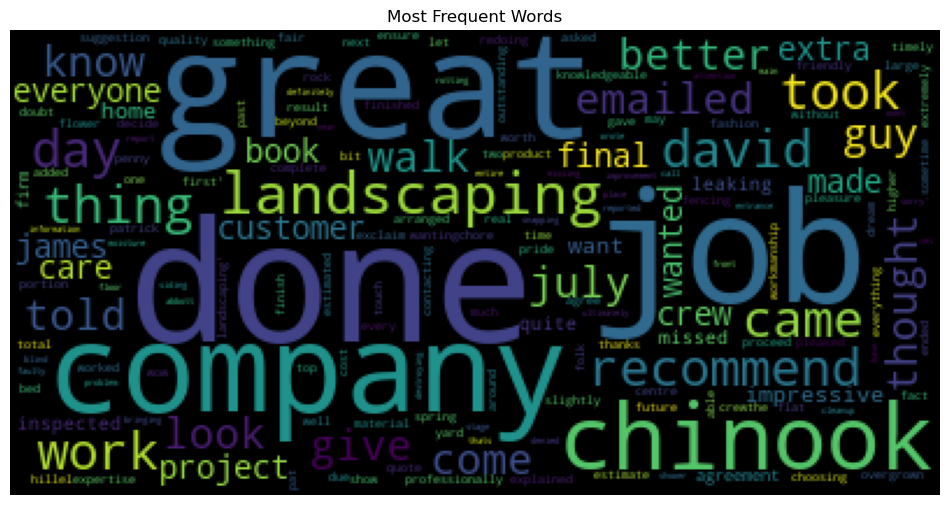

In [98]:
wordcloud = WordCloud().generate(str(text_1))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

#### 3.2. Frequent Bigrams from Reviews

In [136]:
# Extract frequent word pair bigrams from training data
tokens = []
for sentence in calgary_gdf['text_processed']:
    tokens.extend(nltk.word_tokenize(sentence))
bigrams = list(nltk.bigrams(tokens))
freq_dist = nltk.FreqDist(bigrams)
freq_bigrams = [bigram for bigram, frequency in freq_dist.most_common(5000)]  # Example: top 10 frequent bigrams

# Vectorize training and test data using frequent word pair bigrams as features
vectorizer = CountVectorizer(ngram_range=(2, 2), vocabulary=set(freq_bigrams))


X1 = vectorizer.fit_transform(calgary_gdf['text_processed'])

dff1 = pd.DataFrame(X1.toarray())
dff1

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     0     0     0     0     0     0     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     0     0     0     0     0     0  ...     0   
4         0     0     0     0     0     0     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
76380     0     0     0     0     0     0     0     0     0     0  ...     0   
76381     0     0     0     0     0     0     0     0     0     0  ...     0   
76382     0     0     0     0     0     0     0     0     0     0  ...     0   
76383     0     0     0     0     0     0     0     0     0     0  ...     0   
76384     0     0     0     0     0     0     0     0     0     0  ...     0   

       4991  4992  4993  4994  4995  4996  4997  4998  4999  
0         0     0     0     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
76380     0     0     0     0     0     0     0     0     0  
76381     0     0     0     0     0     0     0     0     0  
76382     0     0     0     0     0     0     0     0     0  
76383     0     0     0     0     0     0     0     0     0  
76384     0     0     0     0     0     0     0     0     0  

[76385 rows x 5000 columns]

In [137]:
freq_bigrams

[('customer', 'service'),
 ('first', 'time'),
 ('come', 'back'),
 ('really', 'good'),
 ('highly', 'recommend'),
 ('pretty', 'good'),
 ('ice', 'cream'),
 ('next', 'time'),
 ('food', 'good'),
 ('even', 'though'),
 ('great', 'place'),
 ('great', 'service'),
 ('feel', 'like'),
 ('would', 'recommend'),
 ('staff', 'friendly'),
 ('ive', 'ever'),
 ('dont', 'know'),
 ('every', 'time'),
 ('good', 'food'),
 ('make', 'sure'),
 ('great', 'food'),
 ('service', 'great'),
 ('going', 'back'),
 ('service', 'good'),
 ('food', 'great'),
 ('good', 'service'),
 ('one', 'best'),
 ('would', 'definitely'),
 ('look', 'like'),
 ('definitely', 'back'),
 ('coming', 'back'),
 ('love', 'place'),
 ('friendly', 'staff'),
 ('spring', 'roll'),
 ('ive', 'never'),
 ('long', 'time'),
 ('food', 'service'),
 ('last', 'time'),
 ('year', 'ago'),
 ('right', 'away'),
 ('recommend', 'place'),
 ('much', 'better'),
 ('dont', 'think'),
 ('super', 'friendly'),
 ('parking', 'lot'),
 ('came', 'back'),
 ('quality', 'food'),
 ('fast', 'f

In [141]:
# this gets the training set and vectorise it
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, calgary_gdf['polarity'],
                                                    test_size=0.20,
                                                    stratify=calgary_gdf['polarity'],
                                                    random_state = 35)
X_train.shape

(61108, 5000)

In [139]:

from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train1, y_train1)

# Evaluate the trained classifier on test data
predictions = clf.predict(X_test1)
print(accuracy_score(y_test1,predictions))

0.6292465798258821


In [142]:
# this fit the Naive Bayes Classifier
m_clf = MultinomialNB()
m_clf.fit(X_train1,y_train1)

# this uses the Naive Bayes Classifier to predict
y_pred1 = m_clf.predict(X_test)

# this prints the f1_score 
print (f1_score(y_test1, y_pred1, average='macro'))
print (accuracy_score(y_test1, y_pred1))

0.38621936520691036
0.6292465798258821


### 3.3. Creating Bag-of-Words

In [115]:
import nltk

# word n-gram (default)
vectorizer = CountVectorizer(analyzer='word',lowercase=True, min_df= 2, stop_words='english',max_features=2500)
X = vectorizer.fit_transform(calgary_gdf["text_processed"])

wor = vectorizer.get_feature_names_out()

dff = pd.DataFrame(X.toarray(),columns=wor)
dff

ability  able  absolute  absolutely  accept  acceptable  access  \
0            0     1         0           0       0           0       0   
1            0     0         0           0       0           0       0   
2            0     0         0           0       0           0       0   
3            0     0         0           0       0           0       0   
4            0     0         0           0       0           0       0   
...        ...   ...       ...         ...     ...         ...     ...   
76380        0     0         0           0       0           0       0   
76381        0     0         0           0       0           0       0   
76382        0     0         0           0       0           0       0   
76383        0     0         0           0       0           0       0   
76384        0     0         0           0       0           0       0   

       accessible  accessory  accident  ...  youll  young  younger  youre  \
0               0          0         0  ...      0      0        0      0   
1               0          0         0  ...      0      0        0      0   
2               0          0         0  ...      0      0        0      0   
3               0          2         0  ...      0      0        0      0   
4               0          0         0  ...      0      0        0      0   
...           ...        ...       ...  ...    ...    ...      ...    ...   
76380           0          0         0  ...      0      0        0      0   
76381           0          0         0  ...      0      0        0      0   
76382           0          0         0  ...      0      0        0      0   
76383           0          0         0  ...      0      0        0      0   
76384           0          0         0  ...      0      0        0      0   

       youve  yum  yummy  yyc  zero  zoo  
0          0    0      0    0     0    0  
1          0    0      0    0     0    0  
2          0    0      0    0     0    0  
3          0    0      0    0     0    0  
4          0    0      0    0     0    0  
...      ...  ...    ...  ...   ...  ...  
76380      0    0      0    0     0    0  
76381      0    0      0    0     0    0  
76382      0    0      0    0     0    0  
76383      0    0      0    0     0    0  
76384      0    0      0    0     0    0  

[76385 rows x 2500 columns]

In [118]:
# Concatenate the two dataframes
concatenated_df = calgary_gdf[['useful', 'funny','cool']].reset_index(drop=True)

# Combine numerical features with the relevant columns
X = pd.concat([pd.DataFrame(X.toarray(),columns=wor),concatenated_df], axis=1)

X

ability  able  absolute  absolutely  accept  acceptable  access  \
0            0     1         0           0       0           0       0   
1            0     0         0           0       0           0       0   
2            0     0         0           0       0           0       0   
3            0     0         0           0       0           0       0   
4            0     0         0           0       0           0       0   
...        ...   ...       ...         ...     ...         ...     ...   
76380        0     0         0           0       0           0       0   
76381        0     0         0           0       0           0       0   
76382        0     0         0           0       0           0       0   
76383        0     0         0           0       0           0       0   
76384        0     0         0           0       0           0       0   

       accessible  accessory  accident  ...  youre  youve  yum  yummy  yyc  \
0               0          0         0  ...      0      0    0      0    0   
1               0          0         0  ...      0      0    0      0    0   
2               0          0         0  ...      0      0    0      0    0   
3               0          2         0  ...      0      0    0      0    0   
4               0          0         0  ...      0      0    0      0    0   
...           ...        ...       ...  ...    ...    ...  ...    ...  ...   
76380           0          0         0  ...      0      0    0      0    0   
76381           0          0         0  ...      0      0    0      0    0   
76382           0          0         0  ...      0      0    0      0    0   
76383           0          0         0  ...      0      0    0      0    0   
76384           0          0         0  ...      0      0    0      0    0   

       zero  zoo  useful  funny  cool  
0         0    0       1      0     0  
1         0    0       0      0     0  
2         0    0       0      0     0  
3         0    0       5      0     0  
4         0    0       6      3     3  
...     ...  ...     ...    ...   ...  
76380     0    0       1      1     0  
76381     0    0       1      0     0  
76382     0    0       6      0     0  
76383     0    0       3      0     0  
76384     0    0       0      0     0  

[76385 rows x 2503 columns]

https://www.geeksforgeeks.org/flipkart-reviews-sentiment-analysis-using-python/?ref=rp

In [ ]:
consolidated = ' '.join(
    word for word in wor.astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

## 4. Build a supervised learning model for text analysis

### 4.1. Train the Model

In [156]:
# this gets the training set and vectorise it
X_train, X_test, y_train, y_test = train_test_split(X, calgary_gdf['polarity'],
                                                    test_size=0.2,
                                                    stratify=calgary_gdf['polarity'],
                                                    random_state = 42)
X_train

ability  able  absolute  absolutely  accept  acceptable  access  \
70696        0     0         0           0       0           0       0   
10264        0     0         0           0       0           0       0   
3953         0     0         0           0       0           0       0   
71482        0     0         0           0       0           0       0   
34774        0     0         0           0       0           0       0   
...        ...   ...       ...         ...     ...         ...     ...   
58889        0     0         0           0       0           0       0   
39034        0     0         0           0       0           0       0   
20225        0     0         0           0       0           0       0   
4961         0     0         0           0       0           0       0   
8720         0     0         0           0       0           0       0   

       accessible  accessory  accident  ...  youre  youve  yum  yummy  yyc  \
70696           0          0         0  ...      0      0    0      0    0   
10264           0          0         0  ...      0      0    0      0    0   
3953            0          0         0  ...      0      0    0      0    0   
71482           0          0         0  ...      0      0    0      0    0   
34774           0          0         0  ...      0      0    0      0    0   
...           ...        ...       ...  ...    ...    ...  ...    ...  ...   
58889           0          0         0  ...      0      0    0      0    0   
39034           0          0         0  ...      0      0    0      0    0   
20225           0          0         0  ...      0      0    0      0    0   
4961            0          0         0  ...      0      0    0      0    0   
8720            0          0         0  ...      0      0    0      0    0   

       zero  zoo  useful  funny  cool  
70696     0    0       0      0     0  
10264     0    0       1      0     0  
3953      0    0       0      0     0  
71482     0    0       0      0     0  
34774     0    0       0      0     0  
...     ...  ...     ...    ...   ...  
58889     0    0       2      0     1  
39034     0    0       3      0     0  
20225     0    0       3      1     2  
4961      0    0       0      0     0  
8720      0    0       0      0     0  

[61108 rows x 2503 columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
  
mode_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train,y_train)
  
#testing the model
pred_dt = model_dt.predict(X_test)
print(accuracy_score(y_test,pred_dt))

### 4.2. Decision Tree Classifier

In [121]:
# this fit the Naive Bayes Classifier
m_clf = MultinomialNB()
m_clf.fit(X_train,y_train)

# this uses the Naive Bayes Classifier to predict
y_pred = m_clf.predict(X_test)

# this prints the f1_score 
print (f1_score(y_test, y_pred, average='macro'))
print (accuracy_score(y_test, y_pred))

0.8134268733810677
0.8299404333311514


#### 4.2.1. Decision Tree Confusion Matrix

<AxesSubplot: >

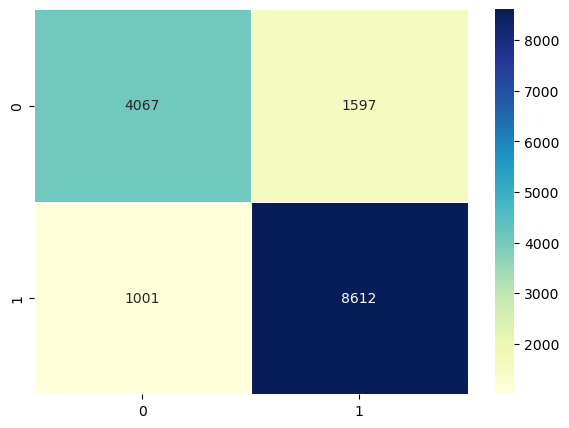

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#creates a grid to plot on
f, ax = plt.subplots(figsize=(7, 5))
#plots confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")

In [123]:
#creates a new logistic regression model
model = LogisticRegression()
#fits (/configures) this model using the training data
model.fit(X_train, y_train)

#then tries to make a prediction using the test dataset's x-variables
y_pred=model.predict(X_test)
y_pred[0:10]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [124]:
#reports the prediction accuracy of the testset
print ('the out of sample test accuracy is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy is : 0.87


In [61]:
#reports the prediction accuracy of the trainset
y_pred_train=model.predict(X_train)
print ('the out of sample test accuracy is : '+ str(round(accuracy_score(y_train, y_pred_train),3)))

the out of sample test accuracy is : 0.909


In [126]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 40],
    'n_estimators': [100, 200, 300]# restricted the grid search to reduce compute time 
}
# Create a based model
model = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5 # number of folds for cross validation
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )

In [127]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.2min
[CV] END .....................max_depth=40, n_estimators=100; total time= 2.8min
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.2min
[CV] END .....................max_depth=40, n_estimators=100; total time= 2.8min


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [128]:
model = grid_search.best_estimator_
y_pred=model.predict(X_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.835


## 5.  Word Embeddings (word2vector)

In [64]:
import gensim
from gensim.models import Word2Vec
import nltk
import numpy as np

import gensim.downloader


In [457]:
wv = gensim.downloader.load('word2vec-google-news-300')

In [157]:
from gensim.models import KeyedVectors

import gensim.downloader as api

# Download and load the pre-trained Google word2vec model
model = api.load('word2vec-google-news-300')


In [159]:
text_column = calgary_gdf['text_processed']
text = text_column.apply(lambda x: x.lower().split())



In [191]:
X = []
for sentence in calgary_gdf['text_processed']:
    vectors = [model[word] for word in sentence.split() if word in model]
    if vectors:
        X.append(np.mean(vectors, axis=0))
    else:
        X.append(np.zeros(model.vector_size))

In [192]:
X

[array([ 0.01206633,  0.05764731,  0.0234465 ,  0.08867249, -0.03917186,
        -0.04301179,  0.09148876, -0.04041775,  0.11297725,  0.0590836 ,
        -0.03650372, -0.09904955, -0.01480161, -0.01458271, -0.0962164 ,
         0.08062323,  0.04525561,  0.07171103,  0.02229011, -0.04467157,
        -0.05263209,  0.03661087,  0.02381956, -0.01221838,  0.03219585,
        -0.00725042, -0.07196219,  0.04870434, -0.01244227,  0.03491837,
        -0.0223285 ,  0.01782422, -0.02583254, -0.01613788,  0.0148915 ,
         0.00056417,  0.04299897, -0.03144318, -0.01475505,  0.0366803 ,
         0.06967907, -0.06574738,  0.12722455, -0.03299918, -0.05684682,
        -0.0463774 , -0.04741336, -0.00297233, -0.03930821,  0.01219451,
         0.00459583, -0.01081325,  0.00863295, -0.02420729, -0.01510268,
         0.01435441, -0.01610252, -0.05270141,  0.08055467, -0.05248456,
        -0.02100441,  0.04468691, -0.11105699, -0.05845212, -0.00266491,
        -0.02524562, -0.08056346,  0.03420925, -0.0

In [181]:
vectors

0        [0.012066328, 0.057647314, 0.023446498, 0.0886...
1        [-0.020961216, 0.04345358, -0.010797409, 0.090...
2        [0.0014933979, 0.11143359, -0.015999962, 0.052...
3        [0.00554439, 0.04865115, 0.008359909, 0.066150...
4        [0.047129996, 0.05177427, 0.013921885, 0.08292...
                               ...                        
82177    [-0.008844284, 0.04336027, -0.05405002, 0.0133...
82178    [0.040520888, 0.06363502, -0.054588318, 0.0833...
82179    [-0.016898856, 0.0011278518, 0.017607993, -0.0...
82180    [0.0044665067, 0.07461432, -0.02789393, -0.019...
82181    [0.04478799, 0.009218277, 0.0015554121, 0.0558...
Name: text_processed, Length: 76385, dtype: object

In [163]:
calgary_gdf['vectors'] = vectors
calgary_gdf

business_id                            name   latitude  \
0      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
1      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
2      MbZMmwo-eL0Jnm_Yb9KJrA  Chinook Landscaping and Design  50.945960   
3      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
4      rdg0b0tHKvSCQNl6u3tS_A               SML Entertainment  51.084990   
...                       ...                             ...        ...   
82177  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82178  knifdfgaeWZ-277S6lsSnA           Martin's Pest Control  50.905732   
82179  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82180  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   
82181  Q4-TlHSvl45XMg2Y1wEVJQ                      Home-Alyze  51.099332   

        longitude  review_count  \
0     -114.037207             3   
1     -114.037207             3   
2     -114.037207             3   
3     -113.989605             5   
4     -113.989605             5   
...           ...           ...   
82177 -114.066646             3   
82178 -114.066646             3   
82179 -114.012717             3   
82180 -114.012717             3   
82181 -114.012717             3   

                                              categories  \
0                Contractors, Landscaping, Home Services   
1                Contractors, Landscaping, Home Services   
2                Contractors, Landscaping, Home Services   
3      Shopping, Caterers, Furniture Stores, Hot Tub ...   
4      Shopping, Caterers, Furniture Stores, Hot Tub ...   
...                                                  ...   
82177                       Pest Control, Local Services   
82178                       Pest Control, Local Services   
82179                     Home Services, Home Inspectors   
82180                     Home Services, Home Inspectors   
82181                     Home Services, Home Inspectors   

                                                   hours  \
0      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
1      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
2      {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
3      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
4      {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...   
...                                                  ...   
82177  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82178  {'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...   
82179  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82180  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   
82181  {'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...   

                    review_id                 user_id  stars_y  ...  \
0      pltqT0DnejbWN-K32BD1Fg  v6zuRbp5jjHroawRiv9IhQ        5  ...   
1      8Iaf1YXNjo3zPd6-uLSJhg  UkL35C-EXA_yje4HeNINeQ        5  ...   
2      fTU0yYLj78NJftEKah-woQ  CXhdG2DP0aplOZPZtNFobw        5  ...   
3      2SGfqlKDjuFpXZ7LjdNJSQ  siNu6MF02MSMnoyPkaxZyg        5  ...   
4      5RfnOMsGcQ26EoXlteFOyw  -InhDRRVG7wrwsgAUvN4Qw        5  ...   
...                       ...                     ...      ...  ...   
82177  pd7i8sxkMfbjdWR926nz8Q  zYLF37lcx2MPIHZVJjahBA        5  ...   
82178  Uu4txscaQB25tF5kuG4gkg  rlY-ah6vhTHiRkJMEtDJ-g        5  ...   
82179  kooH5UmJ5k-8USDe03jI9Q  Id5k4kNeblkyQSuteVURGQ        1  ...   
82180  2SUoFTckEOdGd1V7GpIvrg  grsdpOuwSdwN3ndafhfa9Q        1  ...   
82181  _1cYlw_lCkStn-RXH2DIbw  5Hs29y5fO7a6ZXWQmUbPaw        1  ...   

                      date        column1          column2           column3  \
0      2017-08-16 01:10:52    Contractors      Landscaping     Home Services   
1      2014-06-15 21:09:06    Contractors      Landscaping     Home Services   
2      2013-08-22 22:10:38    Contractors      Landscaping     Home Services   
3      2009-06-29 02:20:25       Shopping         Caterers  Furniture

In [188]:
y = pd.factorize(calgary_gdf['polarity'])[0]
y

array([0, 0, 0, ..., 1, 1, 1])

In [198]:
# Split dataset into train and test sets
split = int(len(X)*0.8)
X3_train, y3_train = X[:split], y[:split]
X3_test, y3_test = X[split:], y[split:]

y3_train

array([0, 0, 0, ..., 1, 0, 1])

In [196]:
# Train a decision tree classifier on the output vectors
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X3_train, y3_train)

# Make predictions on the test set
y_pred3 = clf.predict(X3_test)

# Calculate accuracy score
accuracy = accuracy_score(y3_test, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.6994828827649407


## Topic Modelling (just for trying)

In [143]:
from sklearn.decomposition import LatentDirichletAllocation

In [144]:
def plot_top_words(model, feature_names, n_top_words, title, rows=2, columns=5):
    fig, axes = plt.subplots(rows, columns, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7,color='black')
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [146]:
import nltk
from nltk.stem import WordNetLemmatizer

# word n-gram (default)
vectorizer = CountVectorizer(analyzer='word',lowercase=True, min_df=2, stop_words='english')
X2 = vectorizer.fit_transform(calgary_gdf["text_processed"])

wor = vectorizer.get_feature_names_out()


bag_of_words = pd.DataFrame(X2.toarray(),columns=[wor])

X2

<76385x32892 sparse matrix of type '<class 'numpy.int64'>'
	with 3235248 stored elements in Compressed Sparse Row format>

In [147]:
# Run LDA
no_topics=10
lda = LatentDirichletAllocation(no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(X2)


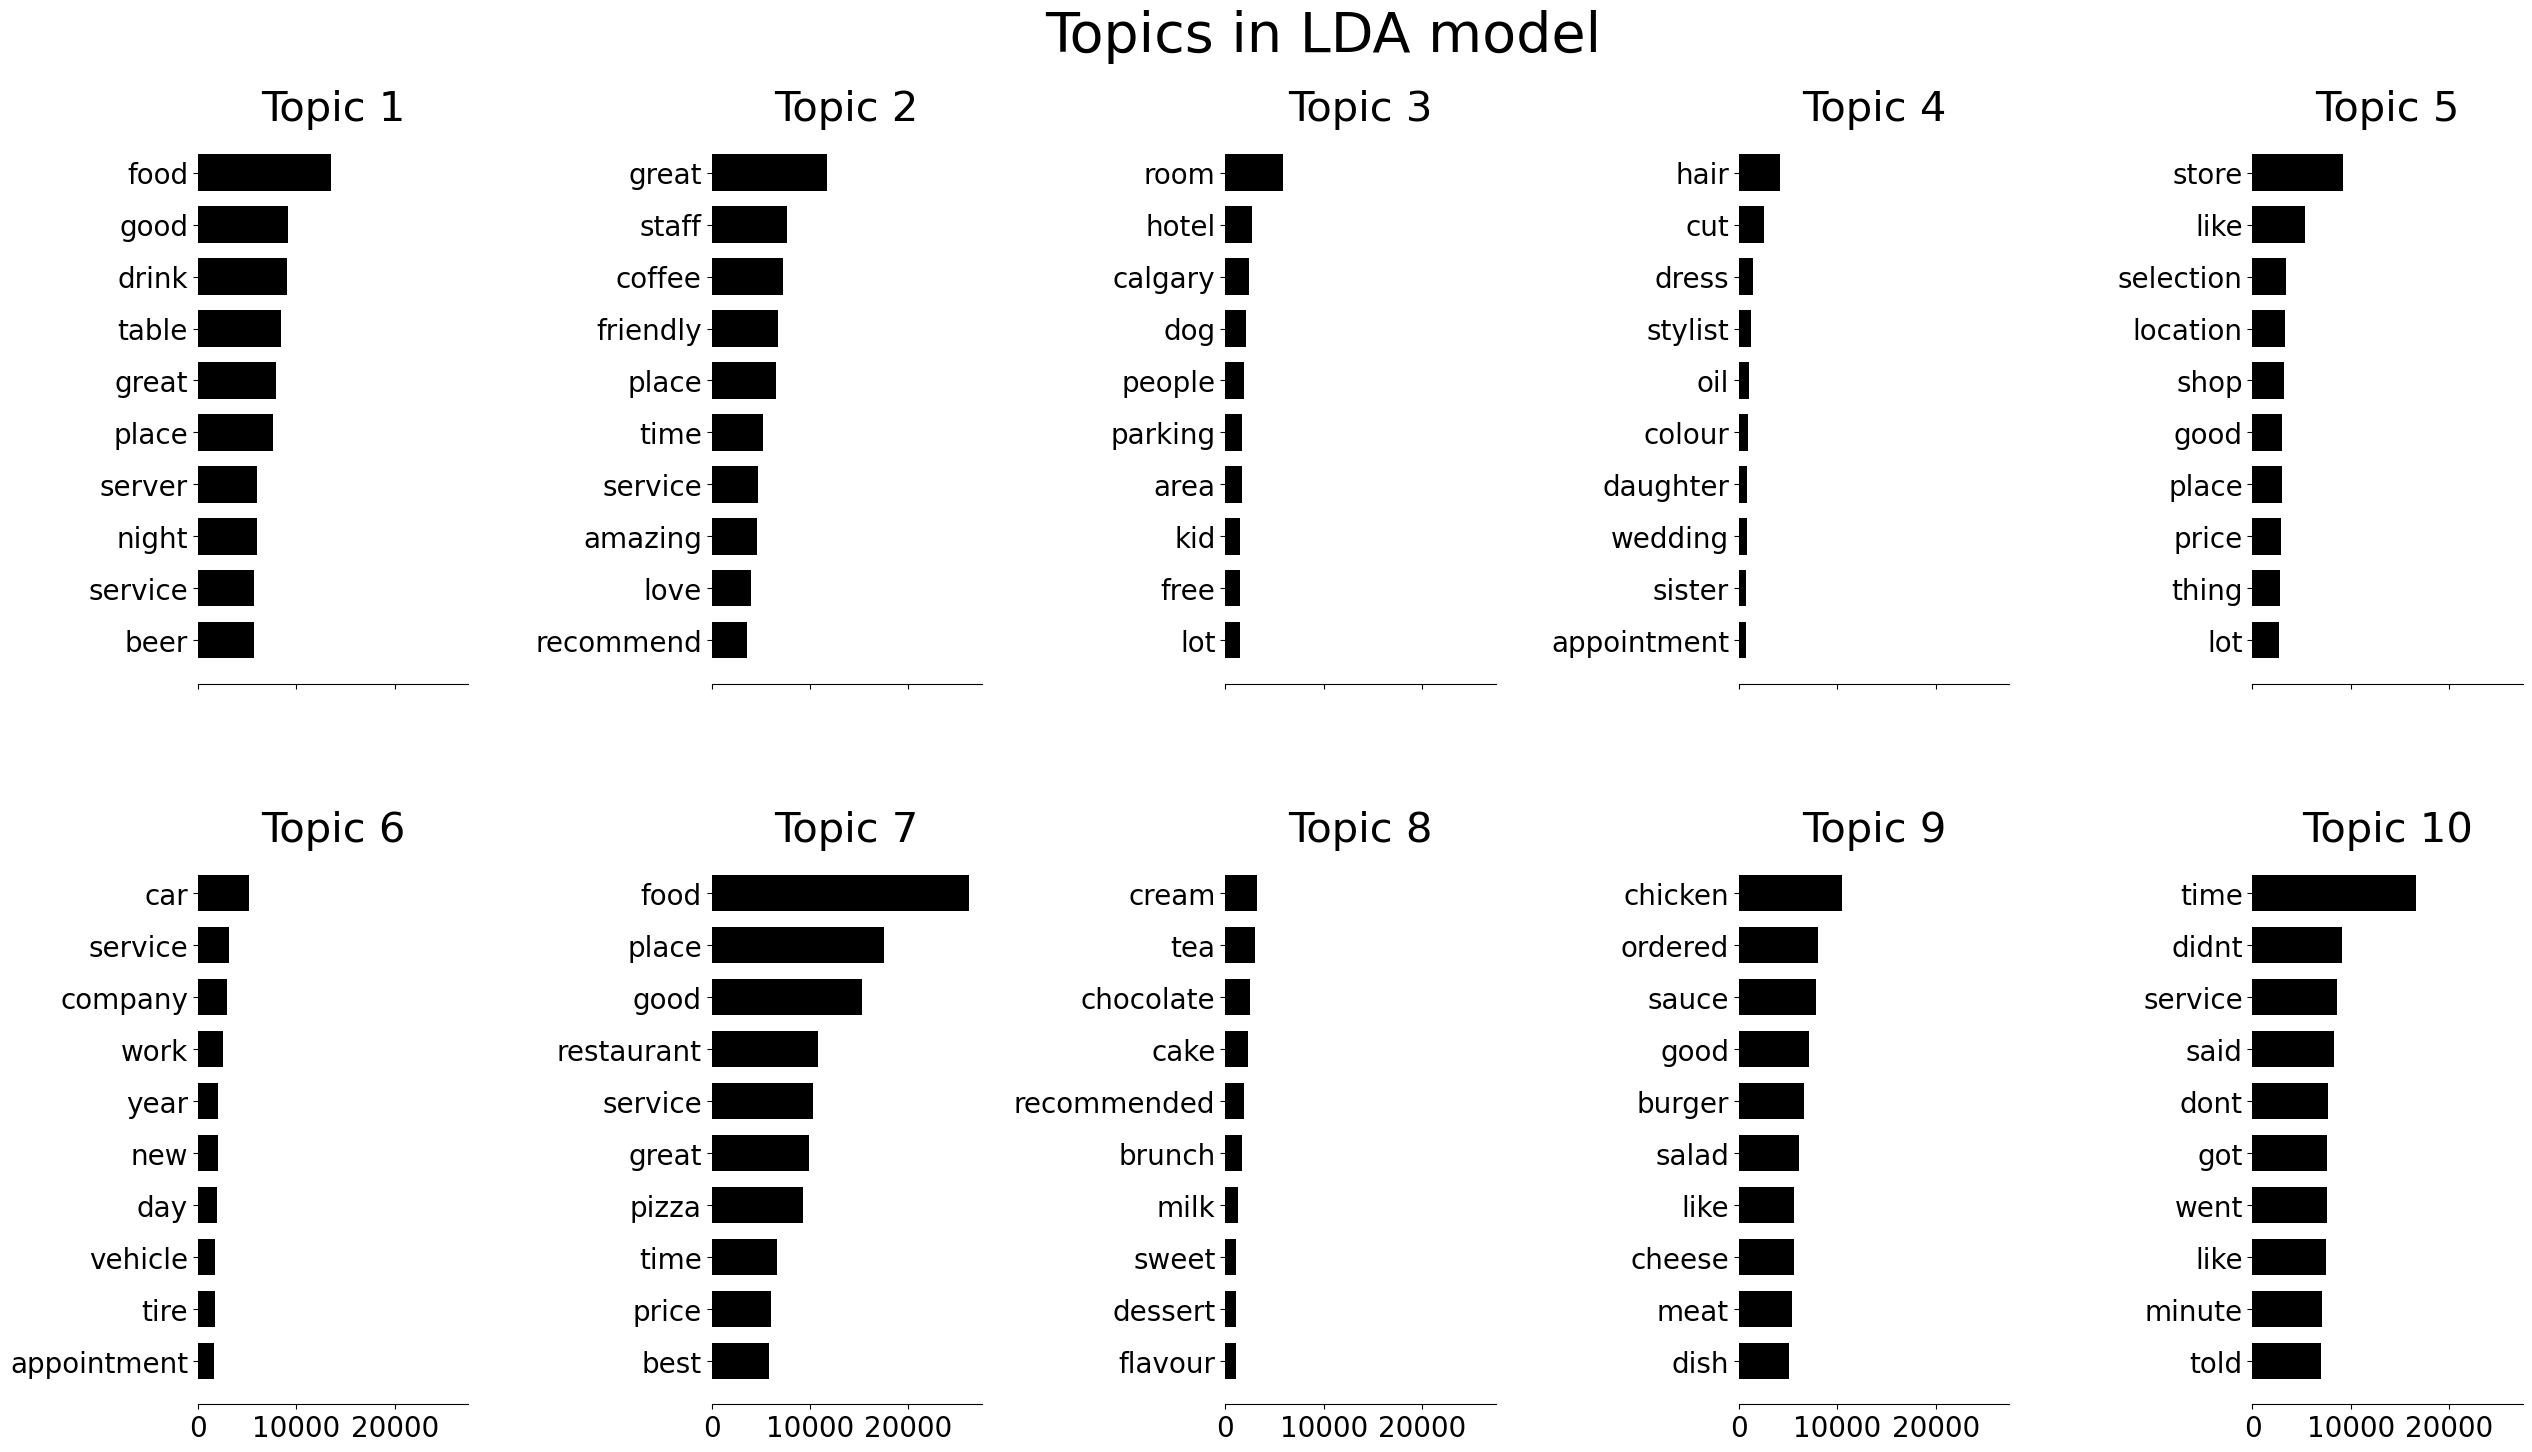

In [500]:
# plot top words
no_top_words = 10
plot_top_words(lda, wor, no_top_words, 'Topics in LDA model')